<h1 style="font-family: Georgia; font-size: 48px; color: #28C381; text-align: center; line-height: 1.25;font-weight:bold;">Python Data Visualization<br><span style="color: #28C381; font-size: 20px">Using three Different Data</span></h1>
<hr>
<h1 style="font-family: Georgia; font-size: 14px; color: #28C381 ; text-align: right; ">Created By:DoubleTree</h1>

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:40px;text-align:center;border-radius:100px 100px">🧾Introduction</p>

<div class="alert alert-block alert-success"><b>Summary</b>: In this notebook,I demonstrate how to visualize using python
<ul>
    <li>1.Provide a brief introduction about Matplotlib</li>
    <li>2.Data: Categorical variable</li>
    <li>3.Data: Time series</li>
    <li>4.Data: Continuous variable</li>
</ul></div>

<b>tools:</b>
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python .If you want to learn more about seaborn,please clip [here](https://matplotlib.org/)
Seaborn is a Python data visualization library based on matplotlib.If you want to learn more about seaborn,please clip [here](https://seaborn.pydata.org/)

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:40px;text-align:center;border-radius:100px 100px">🧾About matplotlib</p>

**Matplotlib has two interfaces**

1.Axes inferface(object-based):firstly,create a figure and one or more axes objects,then ise methods on these objects.

Example:
```
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Sample plot")
plt.show()

```
2.pyplot interface(function-based):consists of functions in the pyplot module.

Example:
```
plt.plot(x, y)
plt.title("Sample plot")
plt.show()
```
pyplot interface is very fast and uesful,but if you want to customize your graphs,you need to use the axes inferface.

https://matplotlib.org/cheatsheets/

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:40px;text-align:center;border-radius:100px 100px">🧰Importing Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.patches import Circle


import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fontdict
fontdict_label={'family':'serif',
                'style':'italic',
                'weight':'normal',
                'size':14,
                'color':'black'}
fontdict_title={
    'family':'serif',
    'style':'normal',
    'weight':'bold',
    'size':16,
    'color':'black'
}
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:center;border-radius:100px 100px">💸Salary about DS</p>

In [3]:
salary = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# preprocessing
salary['top_job_title'] = salary.groupby(by='job_title')[['job_title']].transform('count')
salary['top_company_location']=salary.groupby(by='company_location')[['company_location']].transform('count')
salary['top_salary_currency']=salary.groupby(by='salary_currency')[['salary_currency']].transform('count')

salary.top_job_title[salary['top_job_title']<100]='Others'

salary.top_job_title[salary['top_job_title']!='Others']= salary['job_title']

salary.top_company_location[salary['top_company_location']<100]='Others'
salary.top_company_location[salary['top_company_location']!='Others']= salary['company_location']

salary.top_salary_currency[salary['top_salary_currency']<100]='Others'
salary.top_salary_currency[salary['top_salary_currency']!='Others']= salary['salary_currency']

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:left;border-radius:100px 100px">Univariate Analysis</p>

Text(0.5, 0.98, 'Count plot of categorical features')

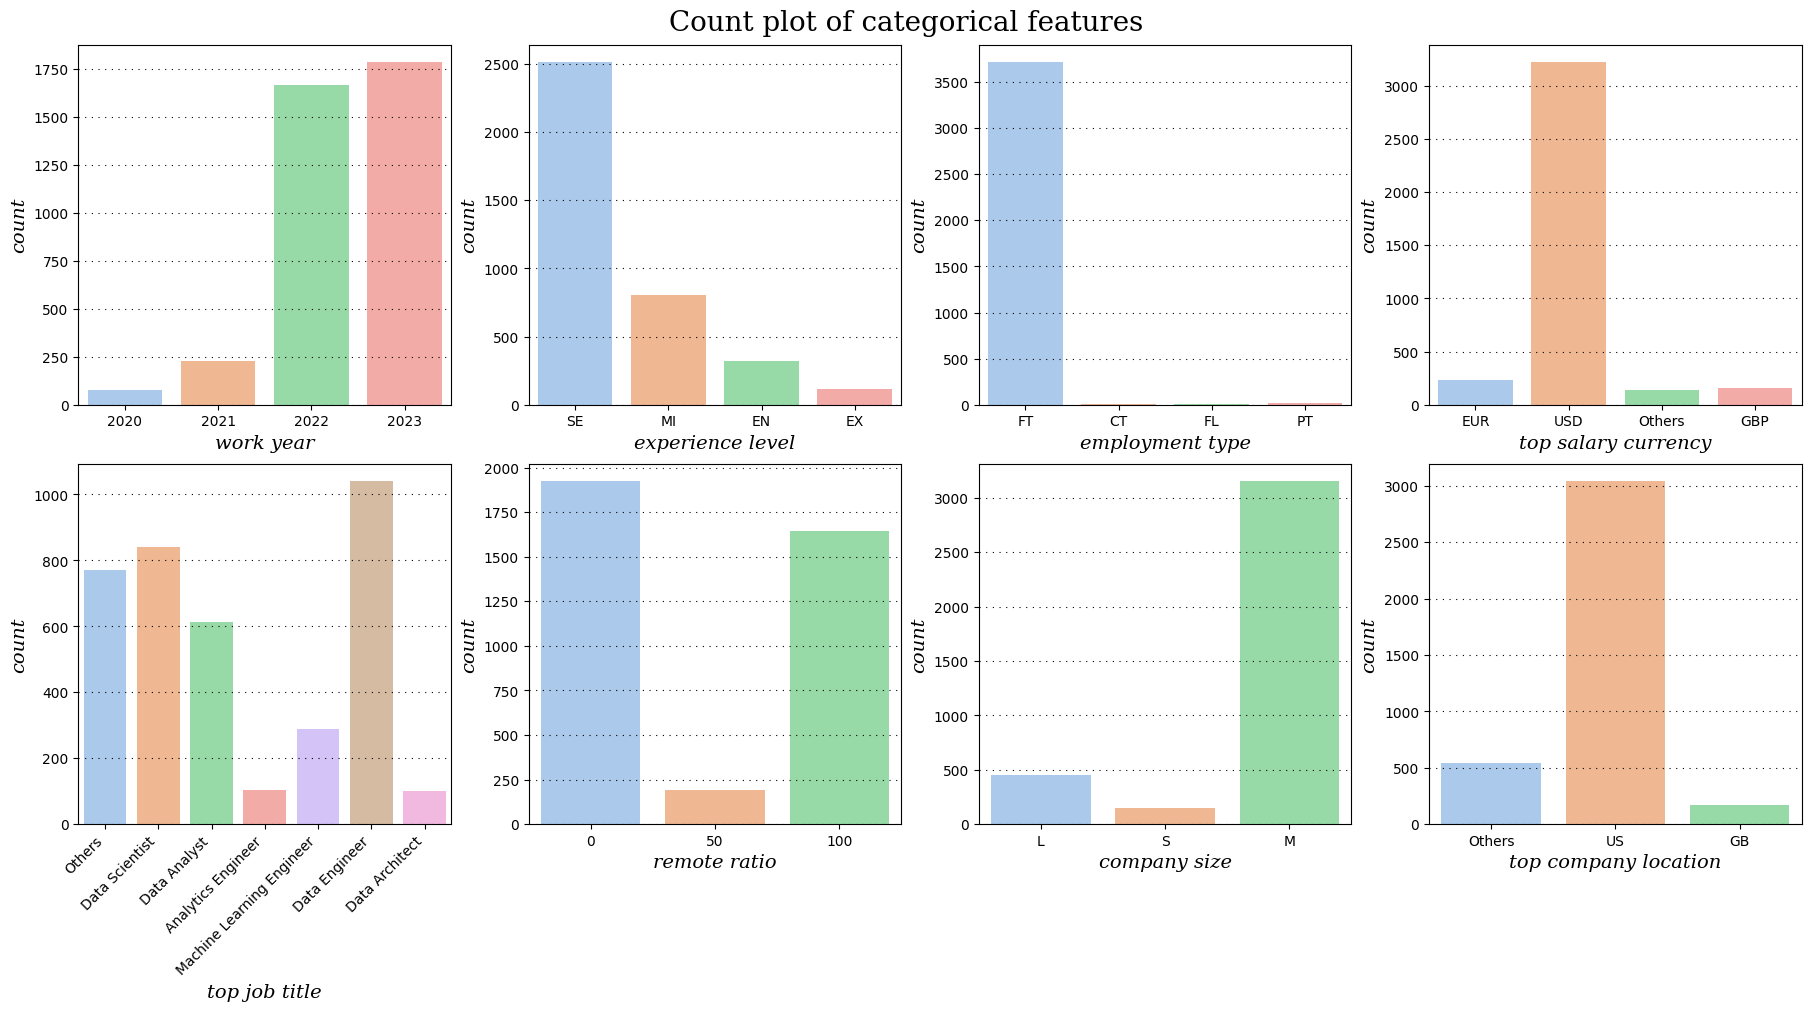

In [5]:
fig,ax = plt.subplots(figsize=(18,10),nrows=2,ncols=4,constrained_layout=True)
#gs = fig.add_gridspec(nrows=3, ncols=3, hspace=0.1, wspace=0.3) < a complex layout of Axes in the figure>
#the 1st subplot is referenced by ax[0][0]


#create lists
categorical_features = ['work_year','experience_level','employment_type','top_salary_currency',
                       'top_job_title','remote_ratio','company_size','top_company_location']

location_ =[(i,j) for i in range(2) for j in range(4)]


#create barplot
for group in zip(location_,categorical_features):
    #axs[group[0][0]][group[0][1]].bar(height=salary[group[1]].value_count())
    sns.countplot(ax=ax[group[0][0]][group[0][1]],data=salary,x=group[1],palette='pastel')
    ax[group[0][0]][group[0][1]].set_xlabel(group[1].replace('_',' '),fontdict=fontdict_label)
    ax[group[0][0]][group[0][1]].set_ylabel('count',fontdict=fontdict_label)
    ax[group[0][0]][group[0][1]].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    
ax[1][0].set_xticklabels(labels=ax[1][0].get_xticklabels(),rotation=45,ha='right')
fig.suptitle("Count plot of categorical features",fontdict=fontdict_title,size=20)

In [6]:
#filter data
Top_job_title = salary.groupby(by='job_title').agg({'salary':'mean','job_title':'count'}).rename(columns={'salary':'mean_salary','job_title':'count'}).sort_values(by='count',ascending=False)[0:10]

Text(160000, 0, '156574.96')

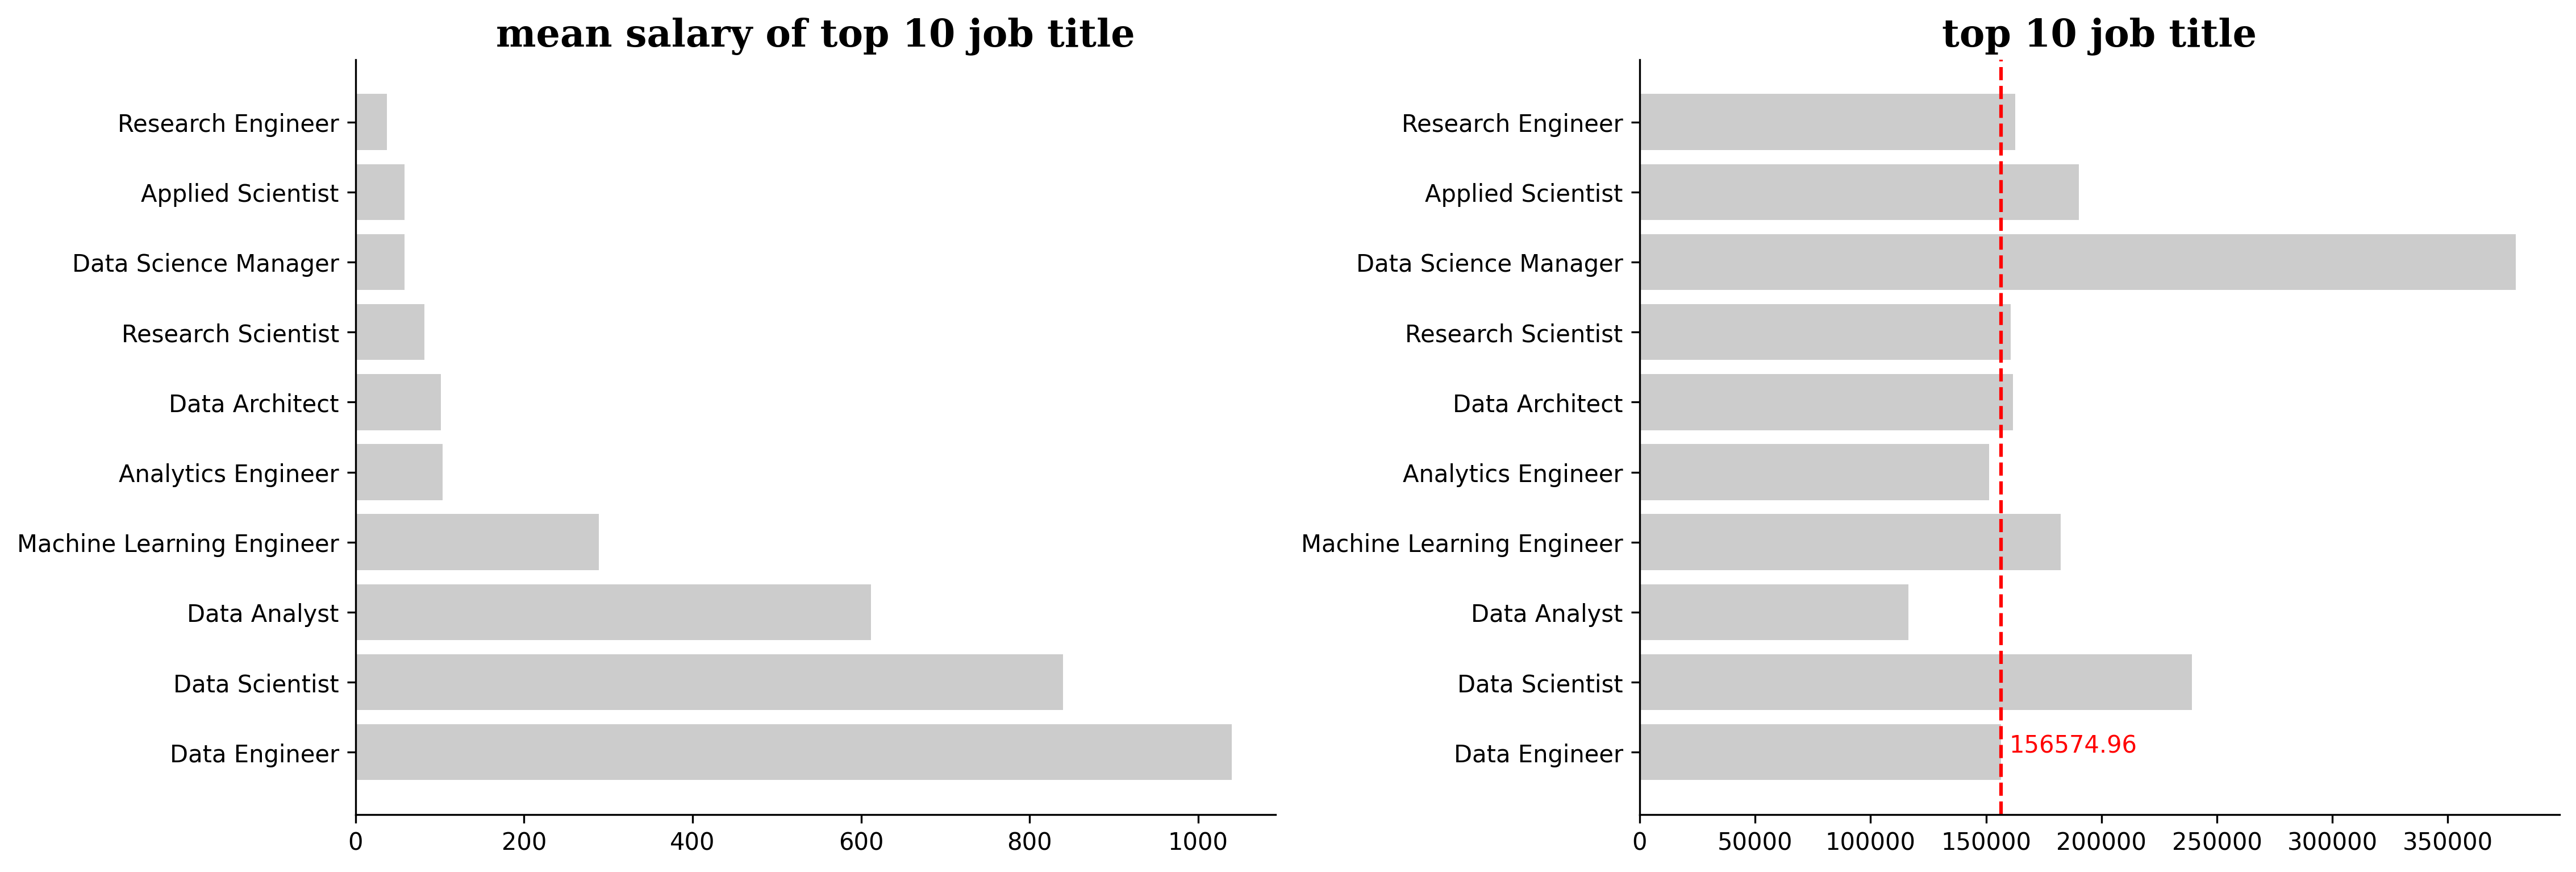

In [7]:
#job title
fig,axs = plt.subplots(1,2,figsize=(15,5),dpi=300,constrained_layout=True)

axs[0].barh(Top_job_title.index,Top_job_title['count'],color='0.8')
axs[0].spines[['top','right']].set_visible(False)
axs[0].set_title('mean salary of top 10 job title',fontdict=fontdict_title)

axs[1].barh(Top_job_title.index,Top_job_title['mean_salary'],color='0.8')
axs[1].set_title('top 10 job title',fontdict=fontdict_title)
axs[1].spines[['top','right']].set_visible(False)


axs[1].axvline(x=156574.963462,color='r',linestyle='--')
axs[1].text(160000,0,'156574.96',fontdict={'fontsize':10,'color':'red'})

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:left;border-radius:100px 100px">Target</p>

In [8]:
#log
salary['log_salary'] = salary.salary.apply(lambda x:np.log(x))

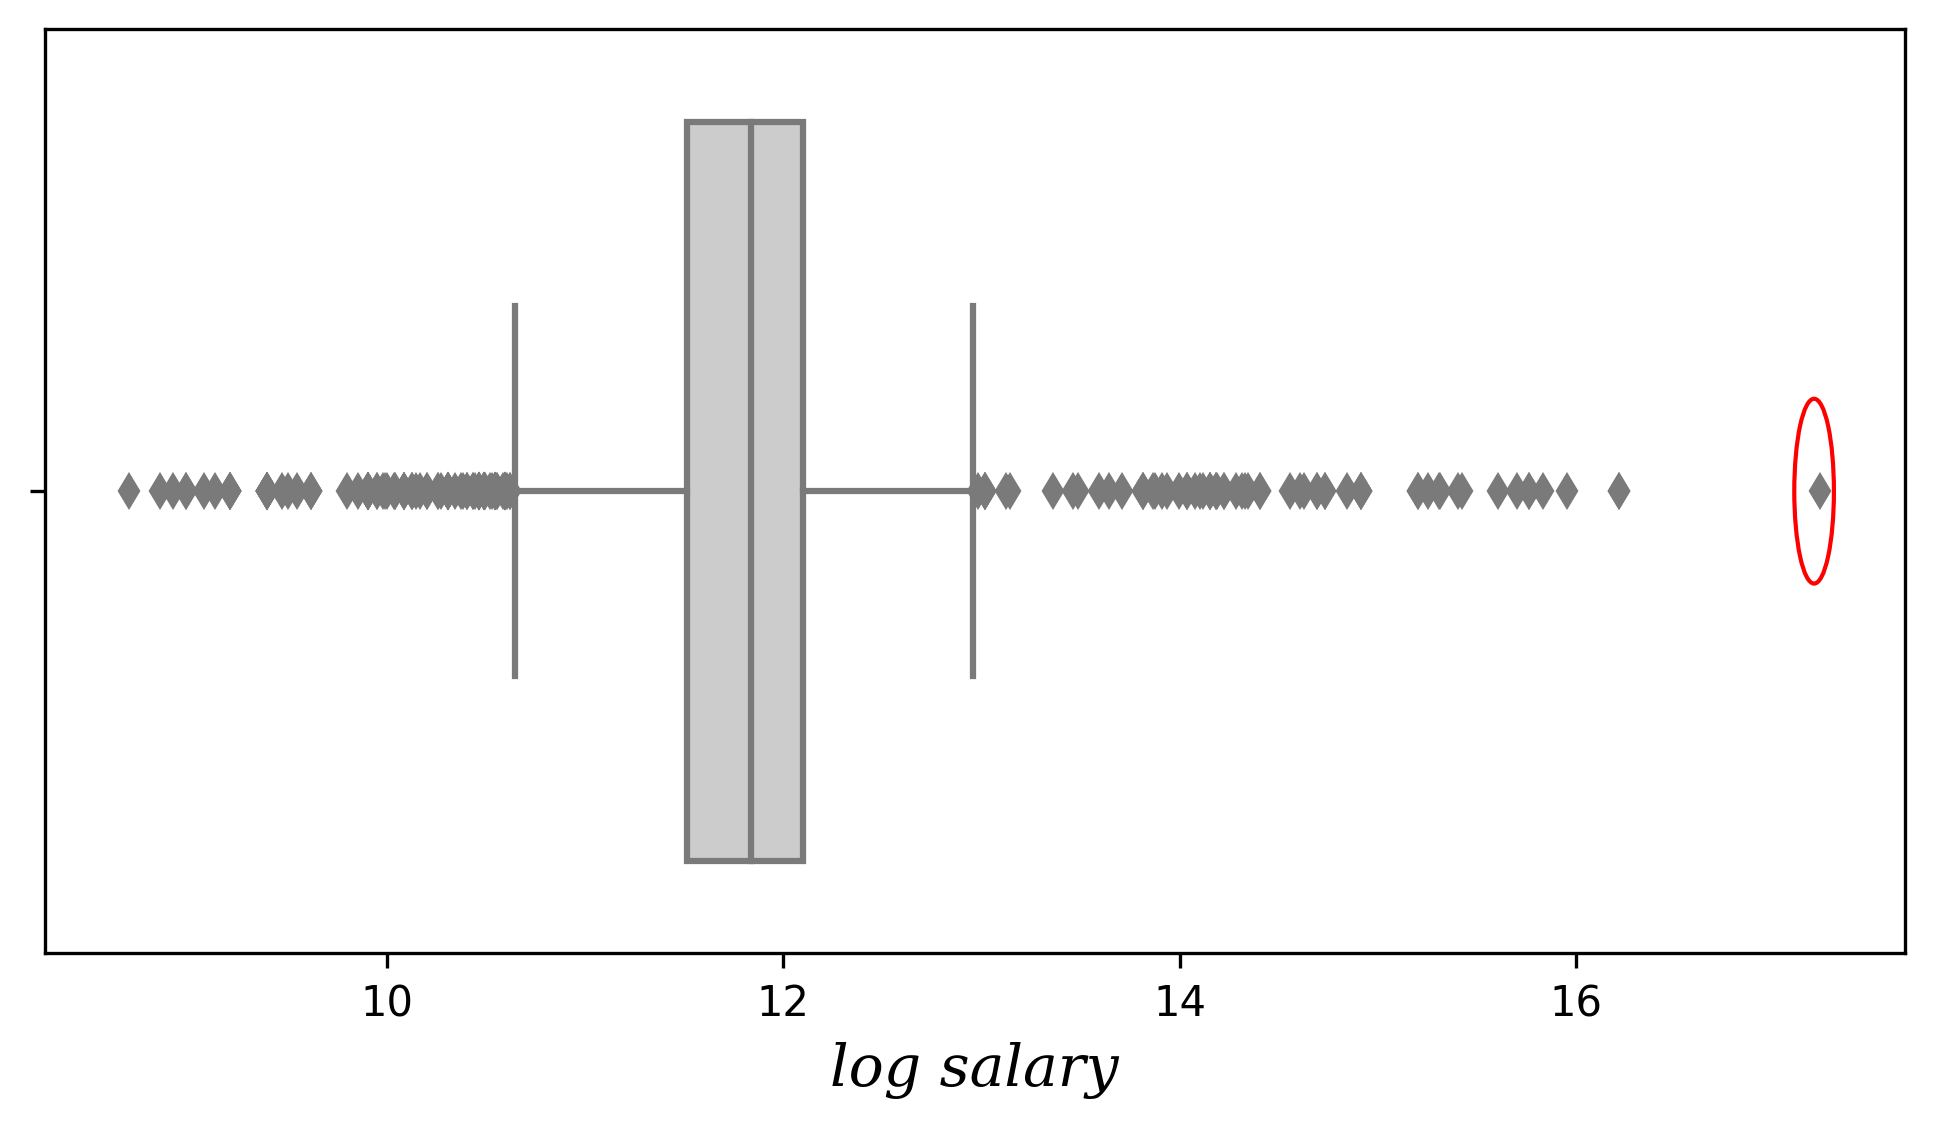

In [9]:
#boxplot
fig,ax = plt.subplots(1,1,figsize=(8,4),dpi=300)
sns.boxplot(ax=ax,data=salary,x='log_salary',color='0.8')

ax.set_xlabel('log salary',fontdict=fontdict_label)


#special
from matplotlib.patches import Circle
circle=Circle((17.2,0),0.1,edgecolor='red',facecolor='none')
ax.add_artist(circle)

Text(0.5, 0, 'log salary')

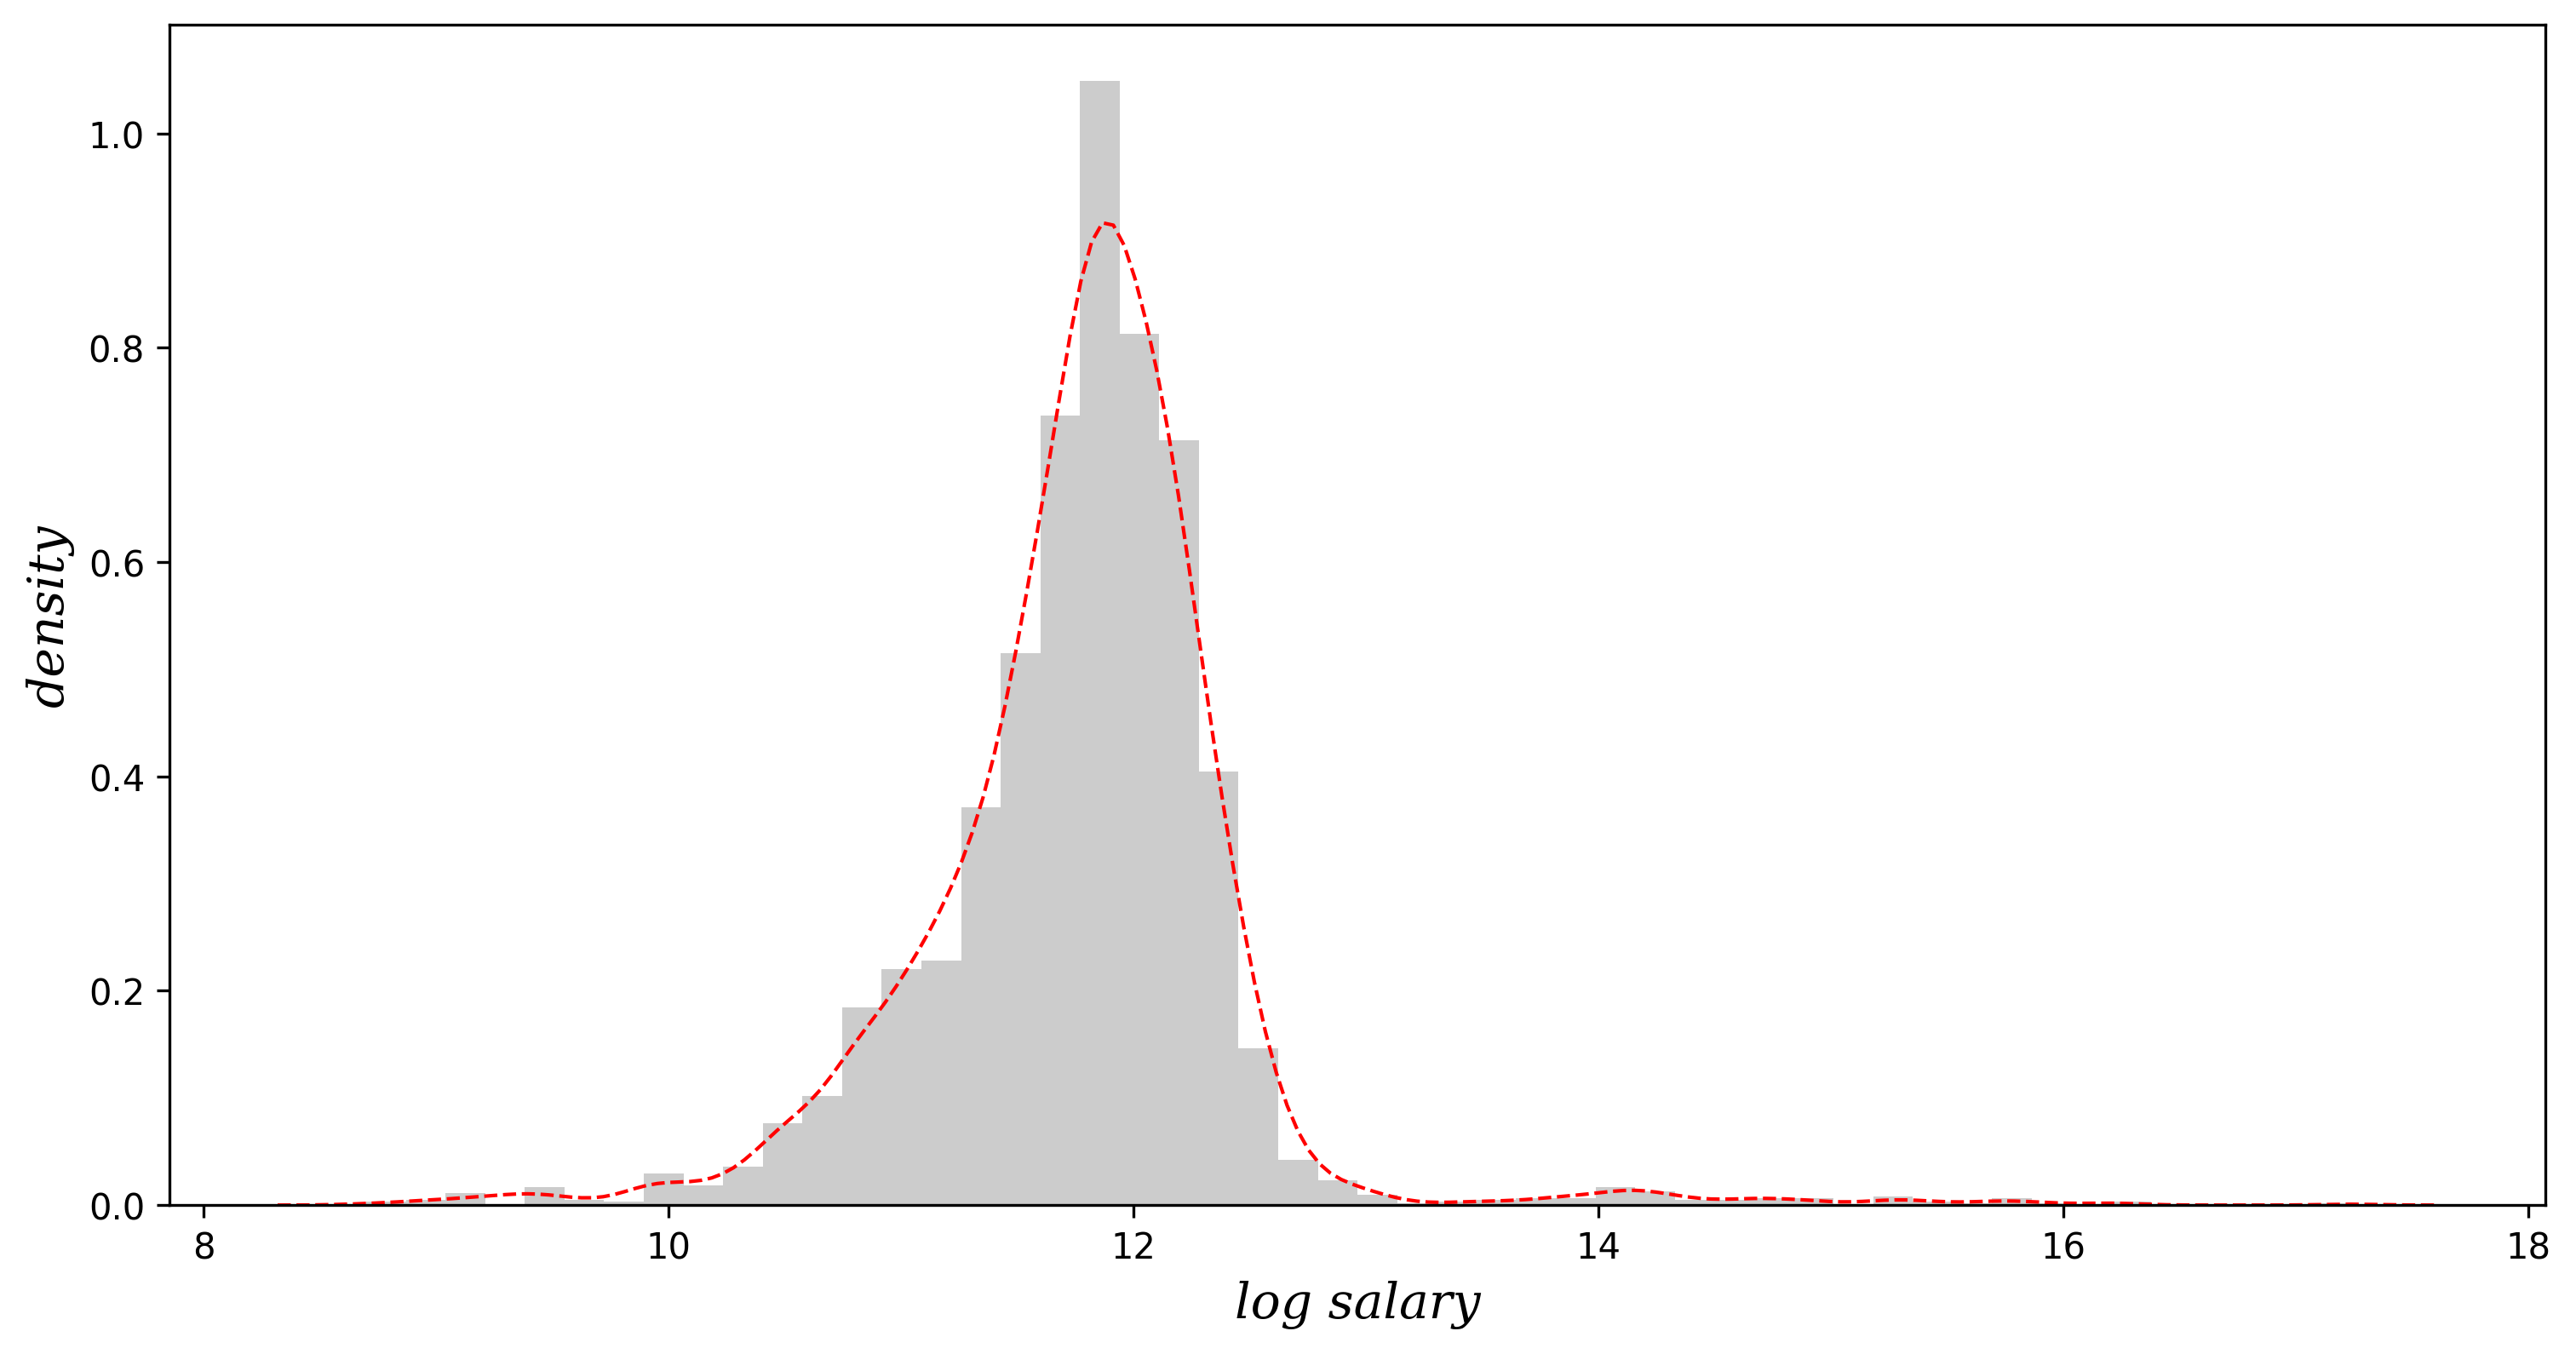

In [10]:
#distplot or histplot
fig,ax = plt.subplots(1,1,figsize=(12,6),dpi=300)
sns.distplot(salary['log_salary'],
             hist_kws={'histtype': 'bar', 'linewidth': 1, 'alpha': 1, 'color': '0.8'},
             kde_kws={'color': 'r', 'linewidth': 1, 'label': 'KDE', 'linestyle': '--'}
             )


ax.set_ylabel('density',fontdict=fontdict_label)
ax.set_xlabel('log salary',fontdict=fontdict_label)

Text(0, 0.5, 'Ordered Values')

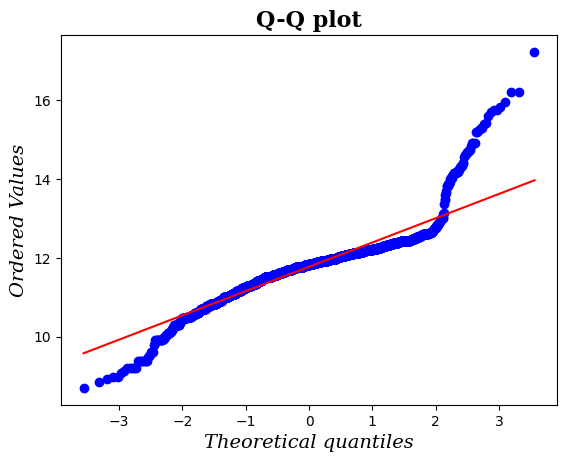

In [11]:
#QQ plot
from scipy import stats
fig,ax = plt.subplots()
res = stats.probplot(salary.log_salary.values,plot=ax)

ax.set_title('Q-Q plot',fontdict=fontdict_title)
ax.set_xlabel('Theoretical quantiles',fontdict=fontdict_label)
ax.set_ylabel('Ordered Values',fontdict=fontdict_label)

Text(0, 0.5, 'Proportion')

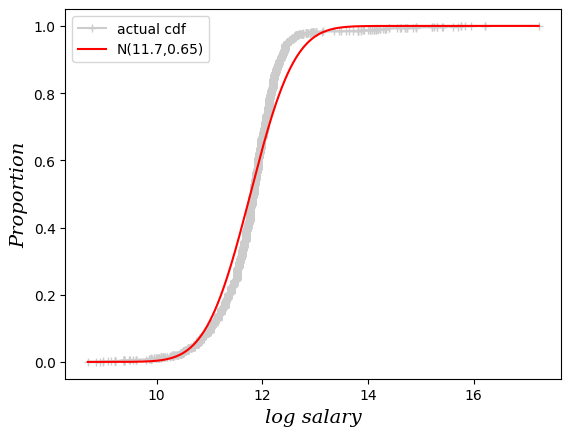

In [12]:
#ecd function
def ecdf(data:np.array):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

#scipy 
from scipy.stats import norm
mu = np.mean(salary['log_salary'].values)
sigma = np.std(salary['log_salary'].values)
x_min=np.min(salary['log_salary'].values)
x_max=np.max(salary['log_salary'].values)
x=np.linspace(x_min,x_max,1000)

cdf_norm = norm.cdf(x,loc=mu,scale=sigma)
cdf_x,cdf_y = ecdf(salary['log_salary'].values)

#plot
fig,ax=plt.subplots()
ax.plot(cdf_x,cdf_y,color='0.8',marker='+',label='actual cdf')
ax.plot(x,cdf_norm,color='red',linestyle='-',label='N(11.7,0.65)')

ax.legend()
ax.set_xlabel('log salary',fontdict=fontdict_label)
ax.set_ylabel('Proportion',fontdict=fontdict_label)

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:left;border-radius:100px 100px">Bivariate analysis</p>

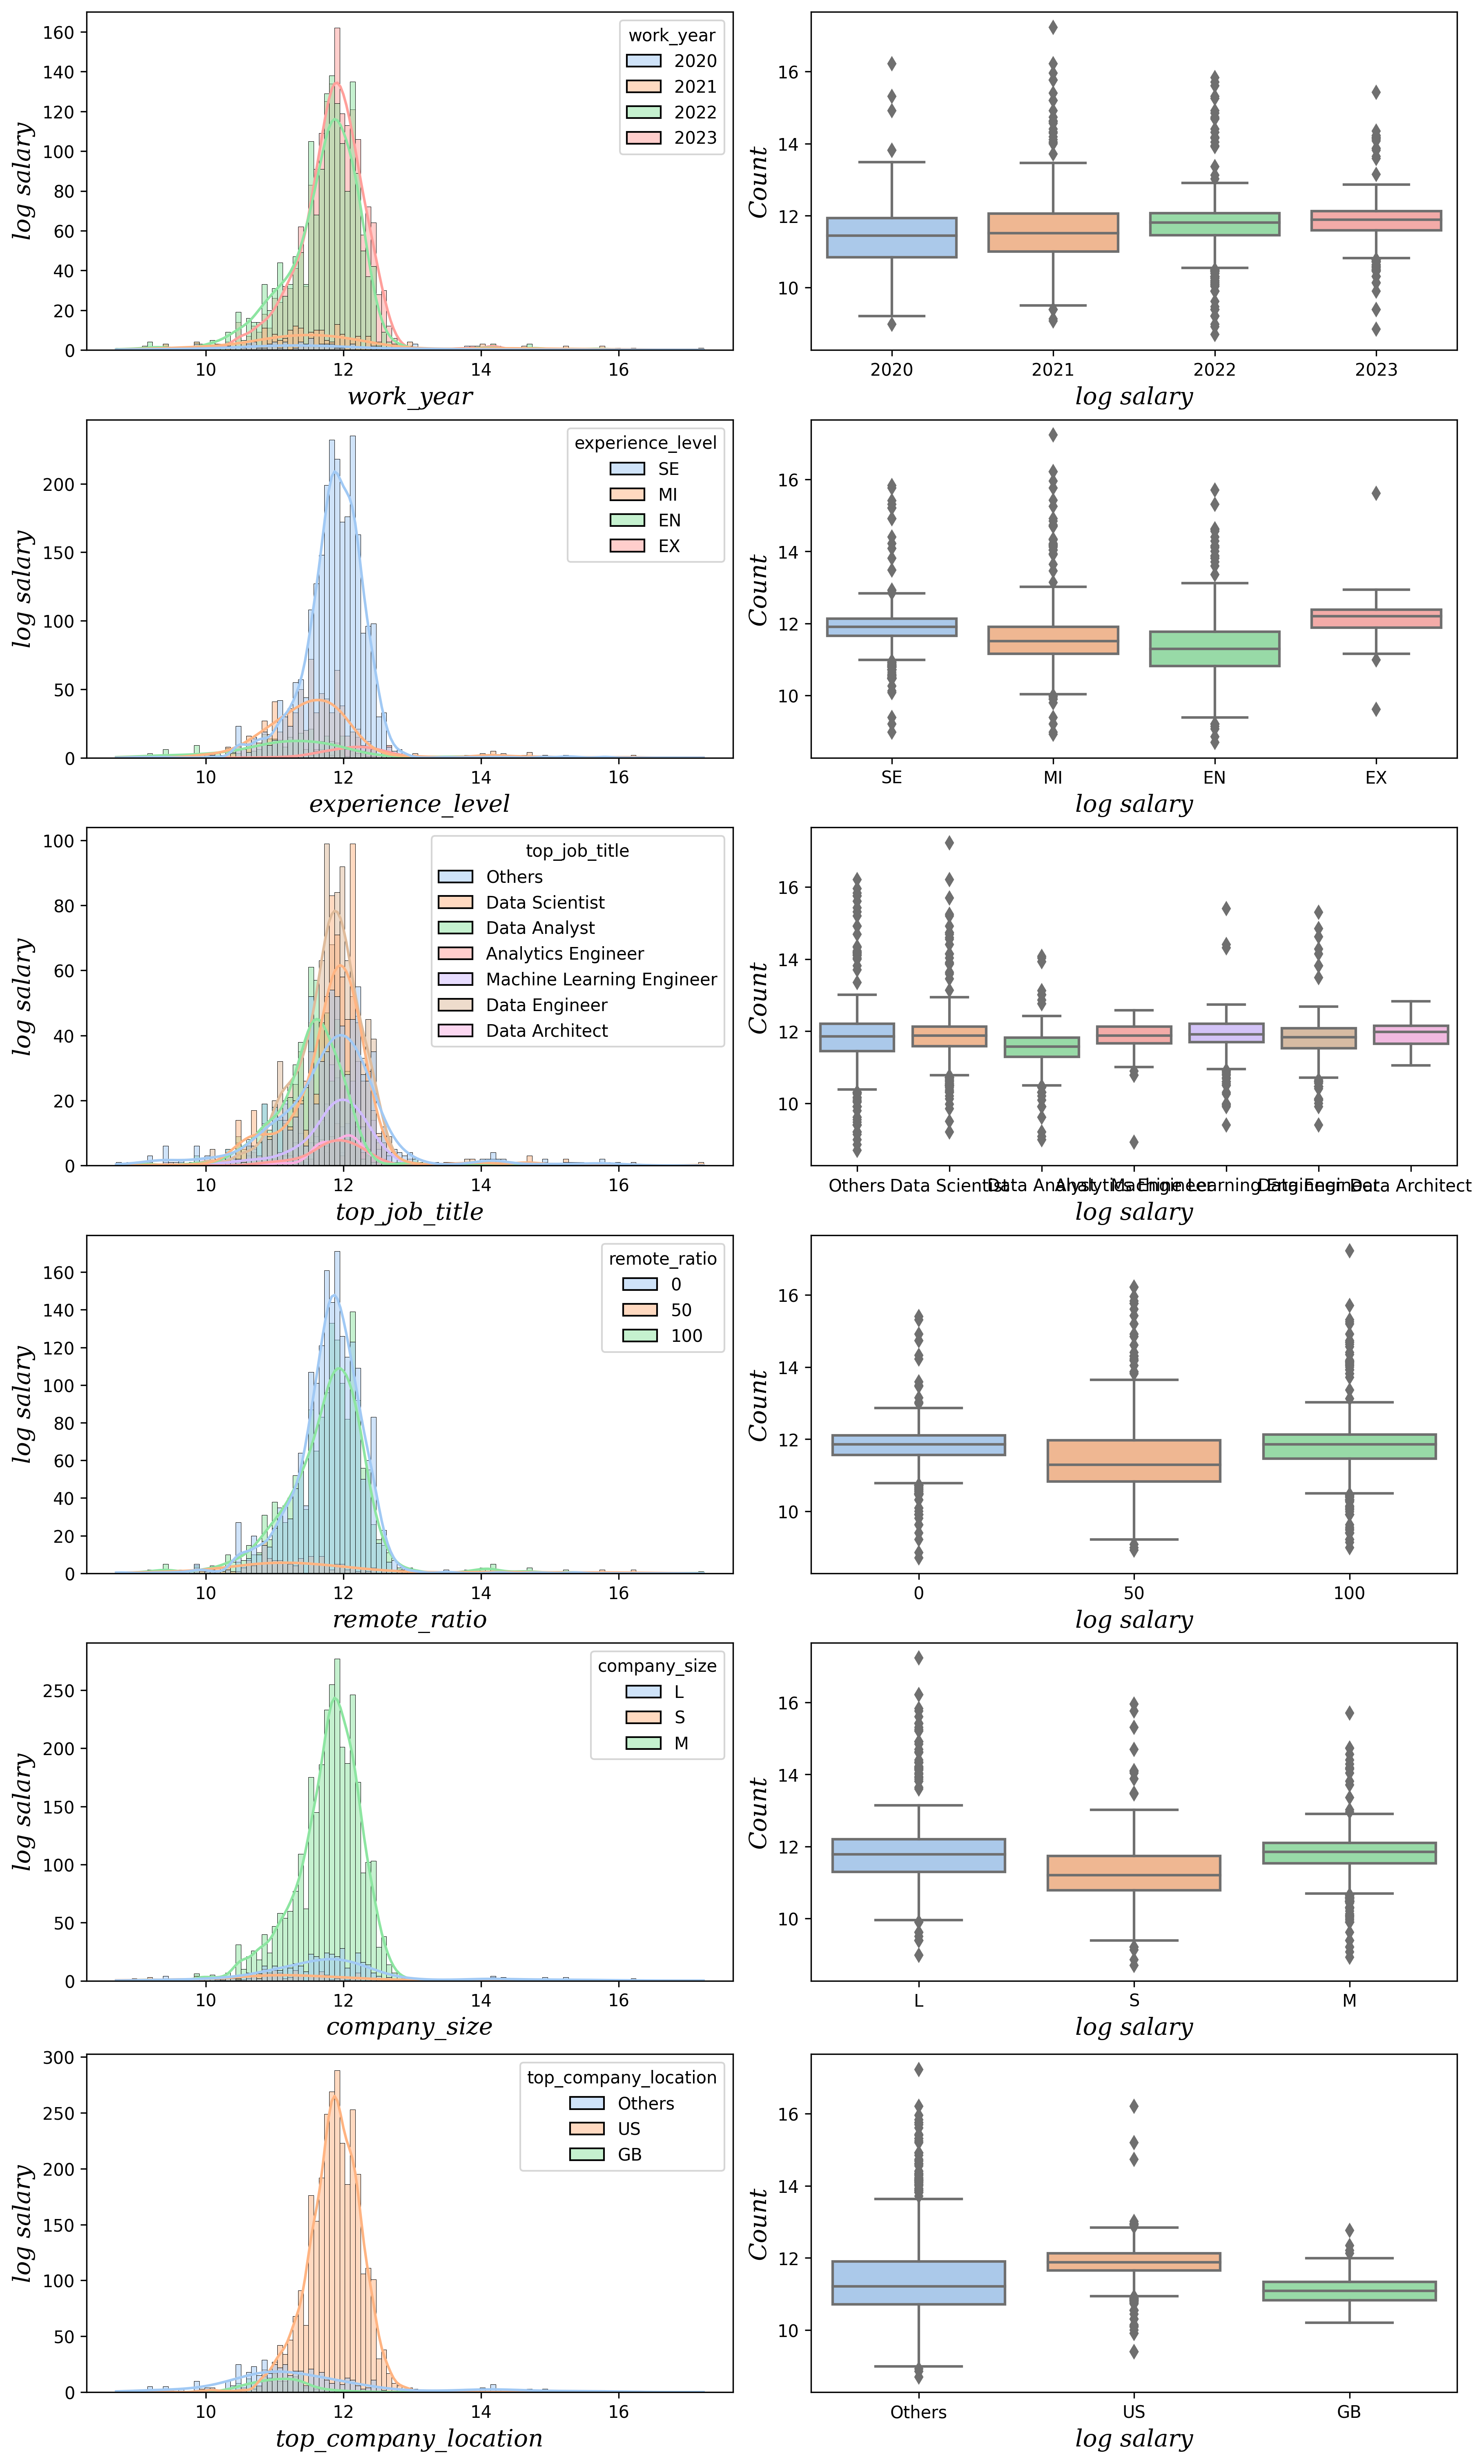

In [13]:
#histogram and boxplot of step
fig,axs = plt.subplots(6,2,figsize=(12,20),dpi=300,constrained_layout=True)

def hist_box(ax1,ax2,var):
    sns.boxplot(data=salary , y='log_salary',x=var,palette='pastel',ax=ax2)
    sns.histplot(data=salary,x='log_salary',hue=var,kde=True,palette='pastel',ax=ax1)
    ax1.set_xlabel(var,fontdict=fontdict_label)
    ax1.set_ylabel('log salary',fontdict=fontdict_label)
    
    ax2.set_xlabel('log salary',fontdict=fontdict_label)
    ax2.set_ylabel('Count',fontdict=fontdict_label)
    
    
hist_box(axs[0][0],axs[0][1],var='work_year')
hist_box(axs[1][0],axs[1][1],var='experience_level')
hist_box(axs[2][0],axs[2][1],var='top_job_title')
hist_box(axs[3][0],axs[3][1],var='remote_ratio')
hist_box(axs[4][0],axs[4][1],var='company_size')
hist_box(axs[5][0],axs[5][1],var='top_company_location')

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:center;border-radius:100px 100px">📈Time series Data</p>


<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:center;border-radius:100px 100px">☁️Climate</p>

In [14]:
Climate = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')
Climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [15]:
#date
Climate['date']=pd.to_datetime(Climate['date'])
Climate['Year'] = Climate['date'].dt.year
Climate['Month']= Climate['date'].dt.month

Text(0, 0.5, 'wind speed')

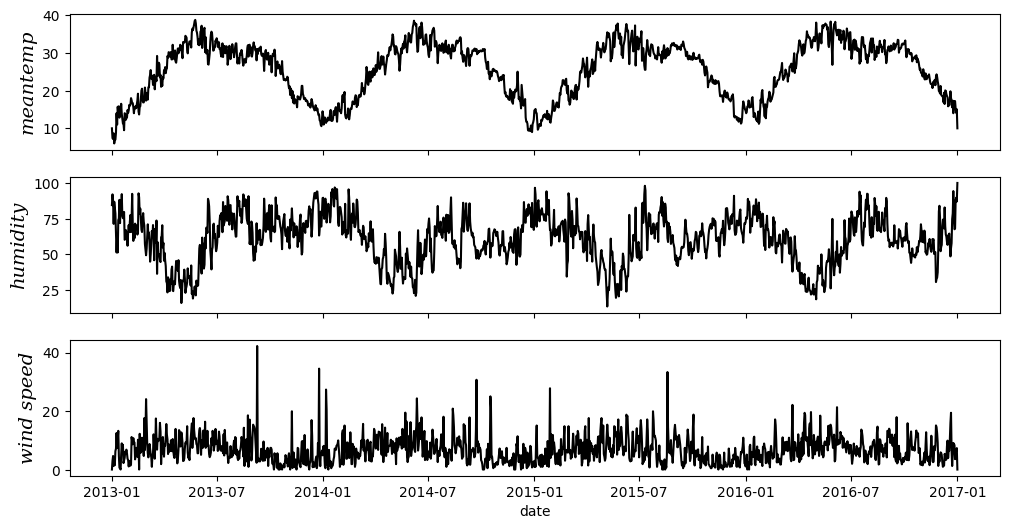

In [16]:
#plot
fig,axs=plt.subplots(3,1,figsize=(12,6),sharex=True)

sns.lineplot(x='date',y='meantemp',data=Climate,ax=axs[0],color='0')
axs[0].set_ylabel('meantemp',fontdict=fontdict_label)
sns.lineplot(x='date',y='humidity',data=Climate,ax=axs[1],color='0')
axs[1].set_ylabel('humidity',fontdict=fontdict_label)
sns.lineplot(x='date',y='wind_speed',data=Climate,ax=axs[2],color='0')
axs[2].set_ylabel('wind speed',fontdict=fontdict_label)

Text(0.5, 1.0, 'PACF(wind speed)')

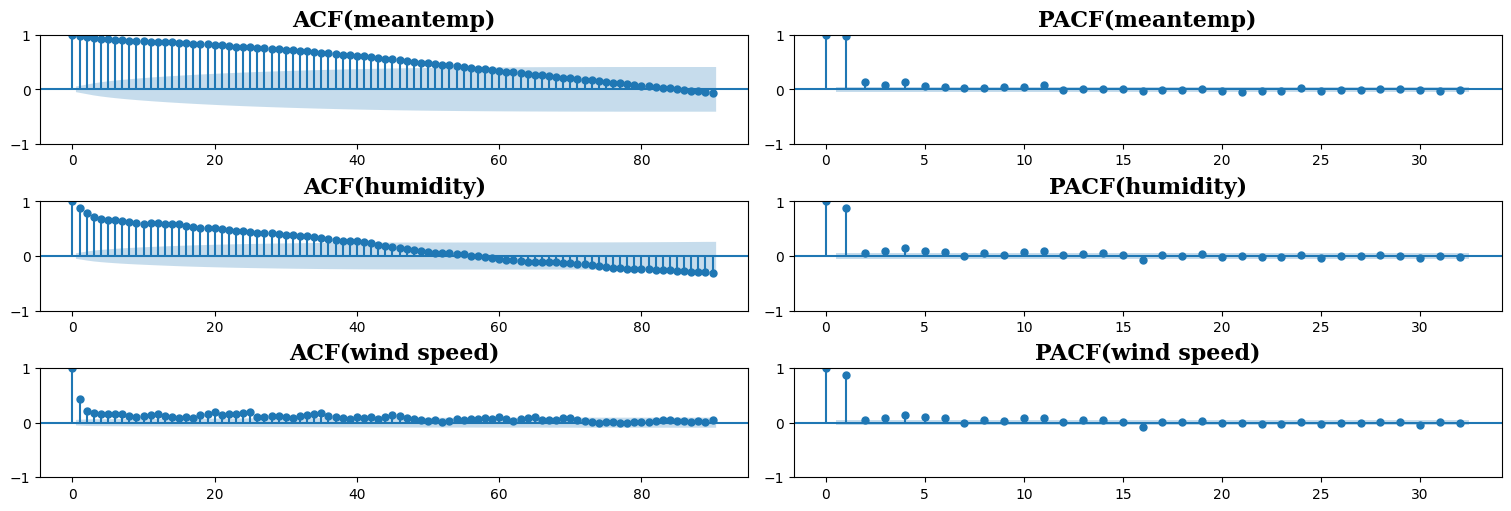

In [17]:
#Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,axs = plt.subplots(3,2,figsize=(15,5),constrained_layout=True)

plot_acf(Climate['meantemp'].values,ax=axs[0][0],lags=90)
axs[0][0].set_title('ACF(meantemp)',fontdict=fontdict_title)
plot_pacf(Climate['meantemp'].values,ax=axs[0][1])
axs[0][1].set_title('PACF(meantemp)',fontdict=fontdict_title)


plot_acf(Climate['humidity'].values,ax=axs[1][0],lags=90)
axs[1][0].set_title('ACF(humidity)',fontdict=fontdict_title)
plot_pacf(Climate['humidity'].values,ax=axs[1][1])
axs[1][1].set_title('PACF(humidity)',fontdict=fontdict_title)

plot_acf(Climate['wind_speed'].values,ax=axs[2][0],lags=90)
axs[2][0].set_title('ACF(wind speed)',fontdict=fontdict_title)
plot_pacf(Climate['humidity'].values,ax=axs[2][1])
axs[2][1].set_title('PACF(wind speed)',fontdict=fontdict_title)

In [15]:
Climate.set_index('date',drop=True,inplace=True)

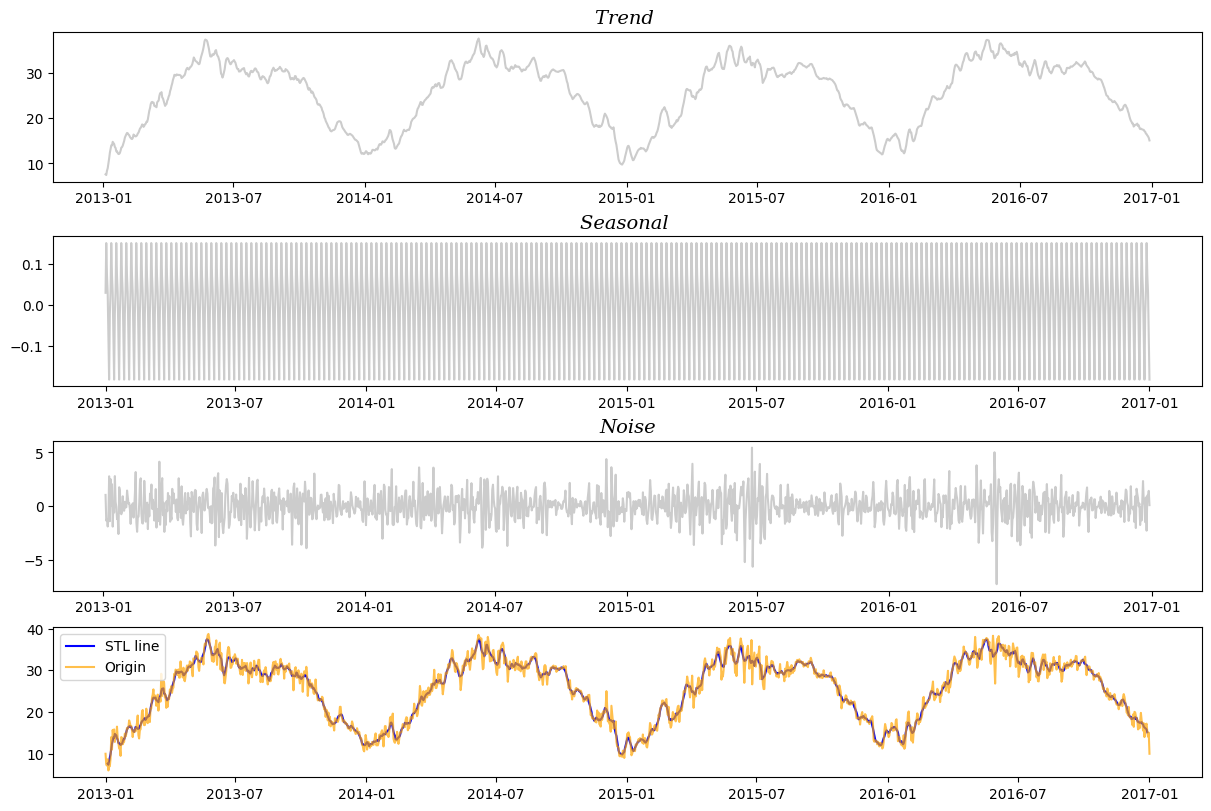

In [18]:
#STL

Climate.set_index('date',drop=True,inplace=True)

import statsmodels.api as sm
dp_meantemp = sm.tsa.seasonal_decompose(Climate['meantemp'],model='additive')

#plot
fig,axs = plt.subplots(4,1,figsize=(12,8),constrained_layout=True)

axs[0].plot(Climate.index,dp_meantemp.trend,color='0.8')
axs[0].set_title('Trend ',fontdict=fontdict_label)

axs[1].plot(Climate.index,dp_meantemp.seasonal,color='0.8')
axs[1].set_title('Seasonal ',fontdict=fontdict_label)

axs[2].plot(Climate.index,dp_meantemp.resid,color='0.8')
axs[2].set_title('Noise',fontdict=fontdict_label)

axs[3].plot(Climate.index,dp_meantemp.trend+dp_meantemp.seasonal,color='blue',label='STL line')
axs[3].plot(Climate.index,Climate.meantemp,color='orange',alpha=0.7,label='Origin')
axs[3].legend(loc='upper left')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


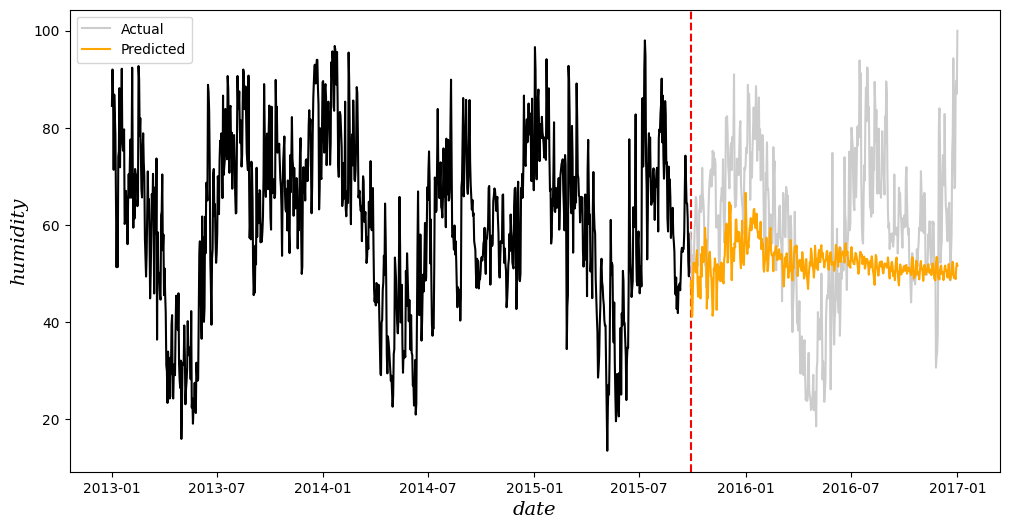

In [19]:
#AutoReg Model(Predict humidity)
from statsmodels.tsa.ar_model import AutoReg

ar = AutoReg(Climate['humidity'][0:1000],lags=180,missing='drop',trend='t',seasonal=True).fit()
predictions = ar.predict(start=1000,end=len(Climate)-1)



fig,ax =plt.subplots(1,1,figsize=(12,6))
ax.plot(Climate.index[0:1000],Climate.humidity[0:1000],color='0')
ax.axvline(x=Climate.index[1000:1001],color='r',linestyle='--')
ax.plot(Climate.index[1000:],Climate.humidity[1000:],color='0.8',label='Actual')
ax.plot(Climate.index[1000:],predictions,color='orange',label='Predicted')

ax.set_ylabel('humidity',fontdict=fontdict_label)
ax.set_xlabel('date',fontdict=fontdict_label)
ax.legend()


<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:center;border-radius:100px 100px">🧠EGG</p>

In [21]:
#load
eeg = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1002379034.parquet')
eeg_2 =pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1628180742.parquet')
ids =pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [22]:
label = ids[ids['eeg_id']==1002379034]
label_2=ids[ids['eeg_id']==1628180742]

In [23]:
eeg.head()

Fp1          F3          C3          P3          F7          T3  \
0 -319.950012  -43.709999 -101.540001 -102.190002 -180.880005  -93.519997   
1 -366.709991 -116.180000 -117.510002 -114.900002 -208.039993 -102.400002   
2 -371.380005 -122.669998 -114.209999 -112.110001 -205.820007 -120.070000   
3 -322.760010  -65.099998 -118.879997 -107.169998 -185.190002 -123.720001   
4 -344.649994  -79.500000 -115.080002  -99.529999 -199.229996 -108.809998   

           T5         O1          Fz          Cz          Pz         Fp2  \
0 -111.820000 -27.139999  -82.470001 -106.230003 -122.430000  -87.339996   
1 -124.139999 -38.709999 -119.709999 -131.020004 -140.970001 -124.160004   
2 -134.429993 -38.630001 -105.500000 -122.099998 -134.460007 -120.930000   
3 -139.339996 -37.820000  -93.300003 -117.480003 -127.339996  -90.459999   
4 -134.919998 -34.740002 -108.440002 -117.040001 -121.809998 -118.739998   

           F4          C4          P4         F8          T4          T6  \
0  -96.360001 -108.050003  -97.629997 -33.889999 -101.199997  -94.139999   
1 -130.330002 -132.820007 -122.059998 -56.840000 -141.500000 -121.500000   
2 -117.160004 -122.110001 -113.050003 -64.089996 -127.709999 -117.180000   
3 -119.930000 -117.800003 -110.660004 -60.930000 -129.990005 -115.910004   
4 -120.059998 -121.650002 -110.559998 -55.369999 -116.379997 -112.970001   

      O2        EKG  
0   0.73  79.809998  
1 -17.83  25.719999  
2 -15.17  27.020000  
3 -10.70  37.740002  
4  -6.80  32.790001

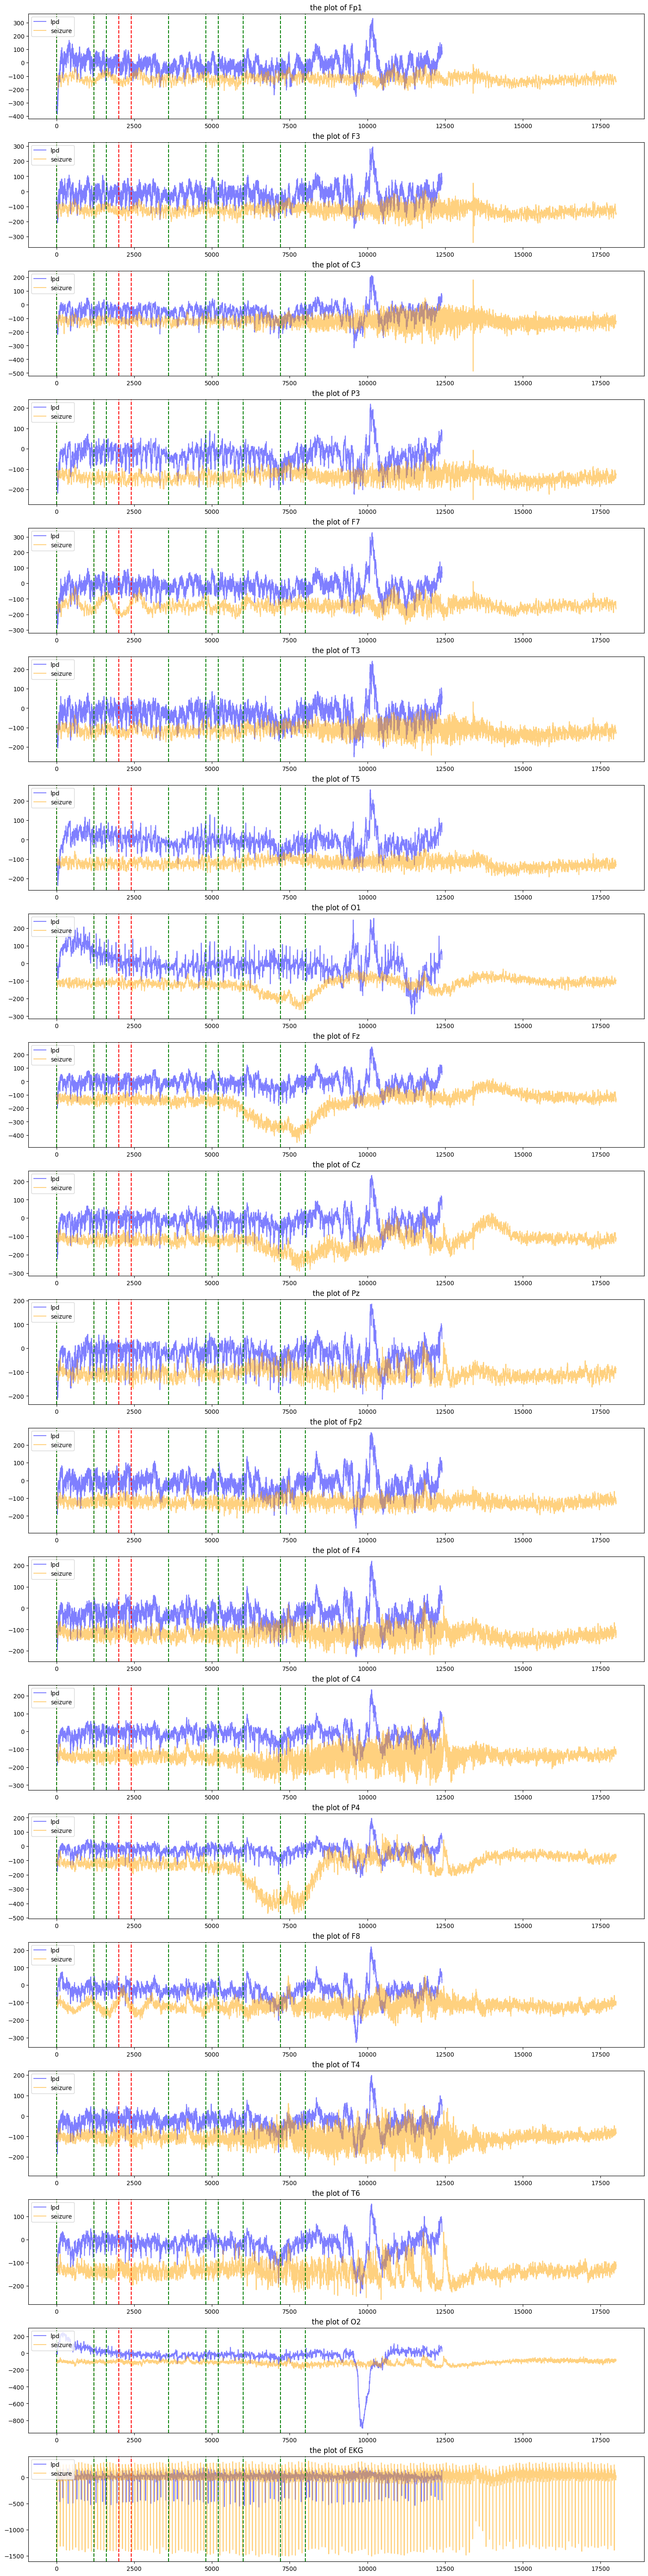

In [24]:
#lineplot
fig,axs =plt.subplots(20,1,figsize=(15,60),constrained_layout=True)

for i,var in enumerate(eeg.columns):
    axs[i].plot(eeg.index,eeg[var],color='blue',label='lpd',alpha=0.5)
    axs[i].set_title('the plot of {}'.format(var))
    for j in label.eeg_label_offset_seconds:
        axs[i].axvline(x=j*200,color='r',linestyle='--')

for i,var in enumerate(eeg_2.columns):
    axs[i].plot(eeg_2.index,eeg_2[var],color='orange',label='seizure',alpha=0.5)
    axs[i].set_title('the plot of {}'.format(var))
    for j in label_2.eeg_label_offset_seconds:
        axs[i].axvline(x=j*200,color='green',linestyle='--')
        
for i in range(20):
    axs[i].legend(loc='upper left')

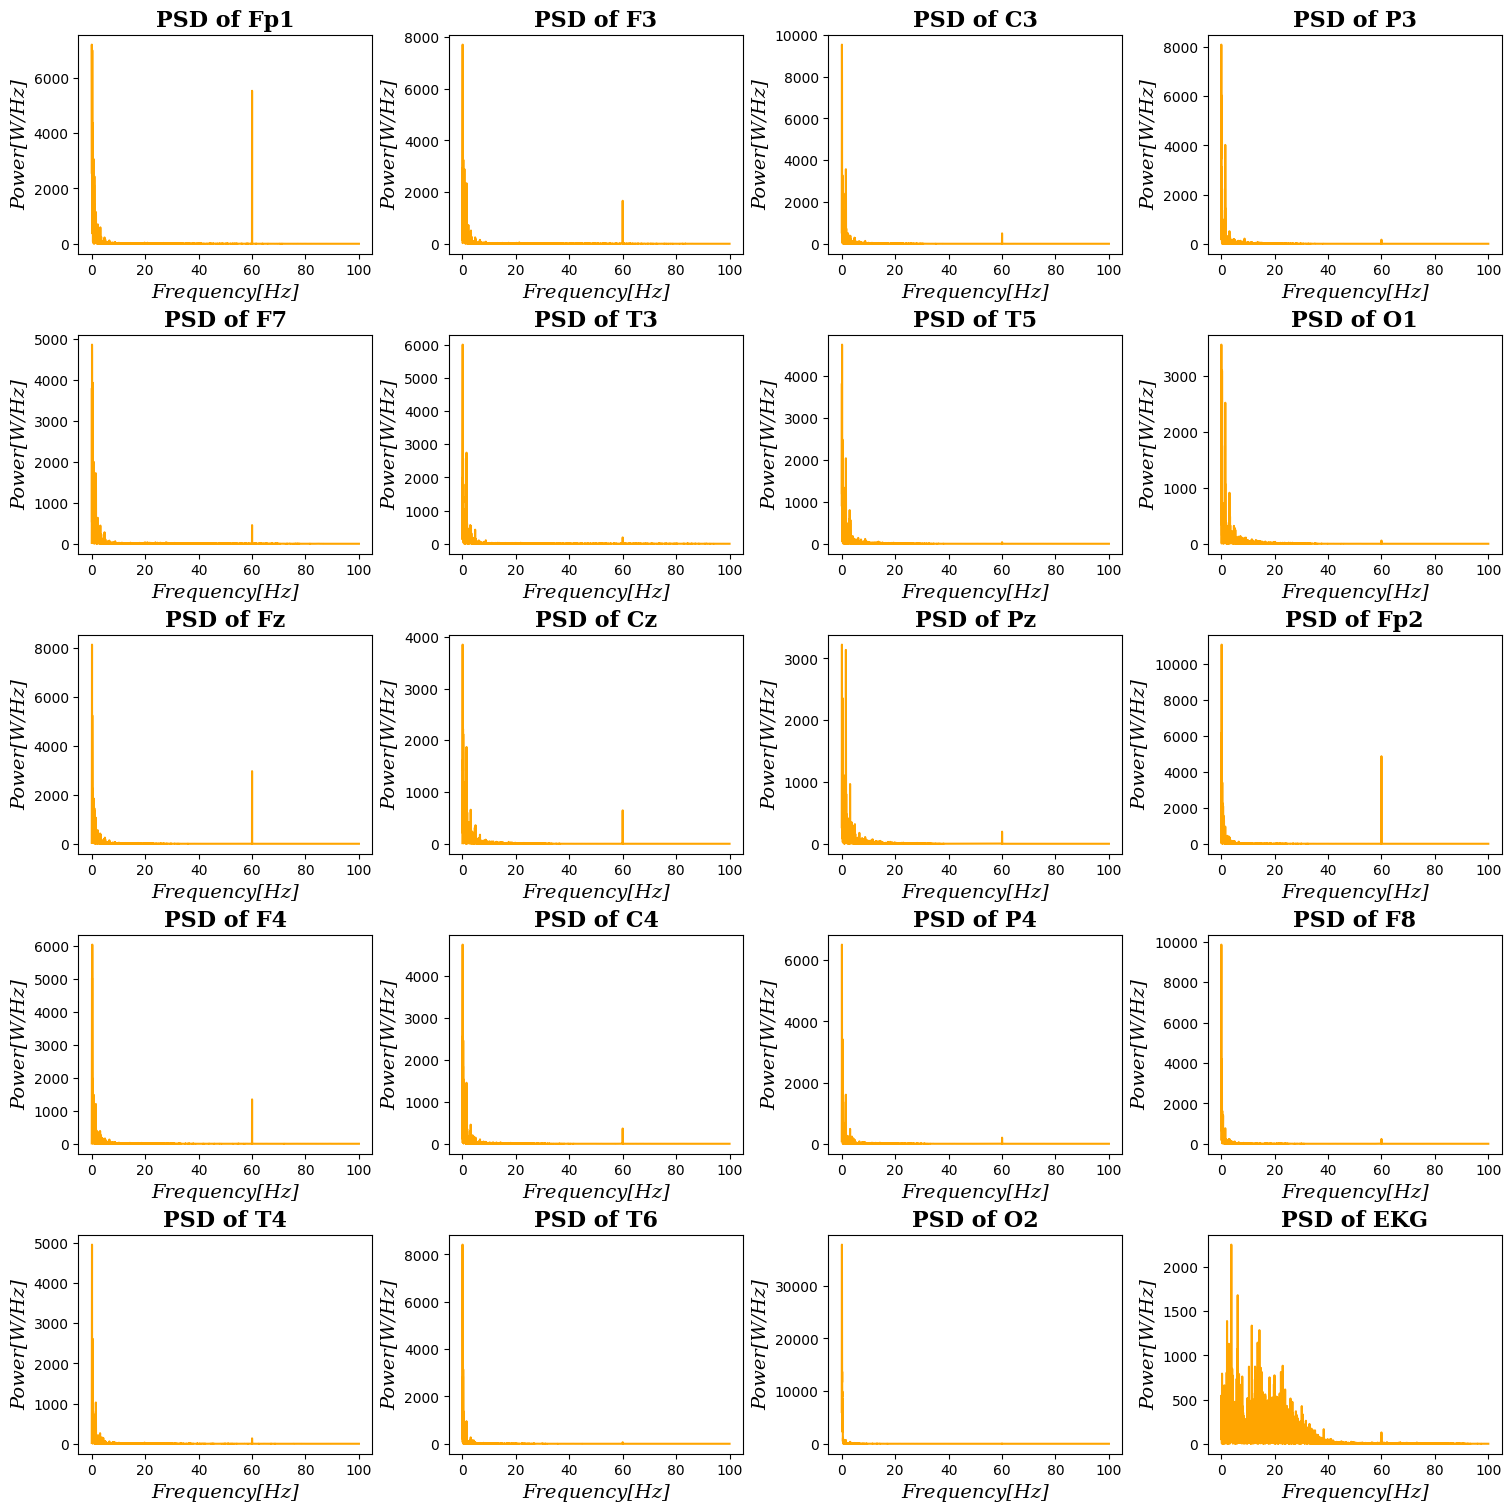

In [25]:
#Power Spectral Density, PSD
from scipy import signal

fig, axs = plt.subplots(5,4,figsize=(15,15),layout='constrained')
location_ =[(i,j) for i in range(5) for j in range(4)]
for z in zip(location_,eeg.columns):
    F,PSD = signal.welch(eeg[z[1]],fs=200, nperseg =20000)
    axs[z[0][0]][z[0][1]].plot(F, PSD,color='orange')
    axs[z[0][0]][z[0][1]].set_xlabel('Frequency[Hz]',fontdict=fontdict_label)
    axs[z[0][0]][z[0][1]].set_ylabel('Power[W/Hz]',fontdict=fontdict_label)
    axs[z[0][0]][z[0][1]].set_title('PSD of {}'.format(z[1]),fontdict=fontdict_title)

In [26]:
#butter filter
#https://librosa.org/doc/latest/index.html
from scipy.signal import butter, lfilter
def butter_lowpass_filter(data:np.array, cutoff_freq: int = 20, sampling_rate: int = 200, order: int = 4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

Text(0.5, 1.0, 'Butter Low Pass Filter')

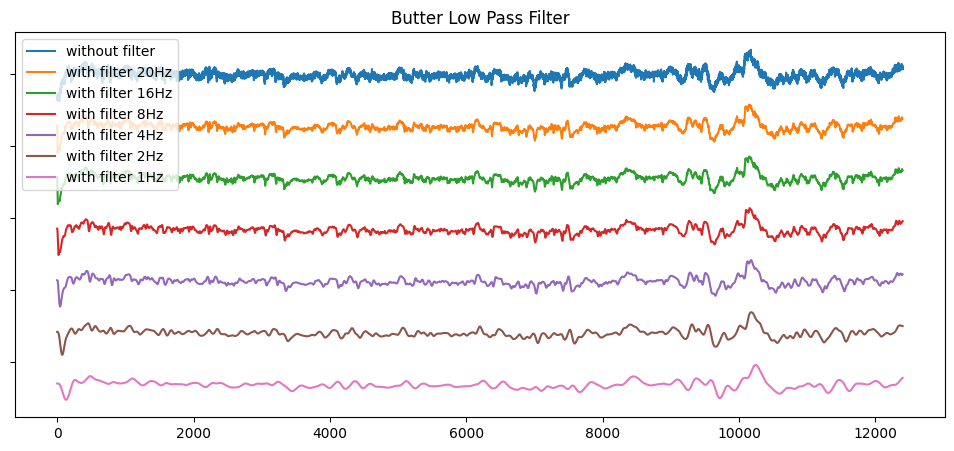

In [27]:
frequencies = [20,16,8,4,2,1]
data = [eeg.Fp1.values]
for frequency in frequencies:
    data.append(butter_lowpass_filter(data[0],cutoff_freq=frequency))

fig,ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(range(len(eeg)),data[0],label='without filter')
for k in range(1,len(data)):
    plt.plot(range(len(eeg)),data[k]-k*(data[0].max()-data[0].min()), label='with filter {}Hz'.format(frequencies[k-1]))
ax.legend()
ax.set_yticklabels([])
ax.set_title('Butter Low Pass Filter')

<p style="font-family:Geogria;font-weight:bold;color:#28C381;font-size:30px;text-align:center;border-radius:100px 100px">🚗mpg</p>

In [28]:
mpg = sns.load_dataset('mpg')
mpg.dropna(inplace=True)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [29]:
#linear
slope_d,intercept_d = np.polyfit(mpg.displacement.values,mpg.mpg.values,1)
slope_h,intercept_h = np.polyfit(mpg.horsepower.values,mpg.mpg.values,1)
slope_w,intercept_w = np.polyfit(mpg.weight.values,mpg.mpg.values,1)
slope_a,intercept_a = np.polyfit(mpg.acceleration.values,mpg.mpg.values,1)

#Quadratic
d2_coefficients = np.polyfit(mpg.displacement.values,mpg.mpg.values,2)
d2_poly = np.poly1d(d2_coefficients)
h2_coefficients = np.polyfit(mpg.horsepower.values,mpg.mpg.values,2)
h2_poly = np.poly1d(h2_coefficients)
w2_coefficients = np.polyfit(mpg.weight.values,mpg.mpg.values,2)
w2_poly = np.poly1d(w2_coefficients)
a2_coefficients = np.polyfit(mpg.acceleration.values,mpg.mpg.values,2)
a2_poly = np.poly1d(a2_coefficients)

#Cubic
d3_coefficients = np.polyfit(mpg.displacement.values,mpg.mpg.values,3)
d3_poly = np.poly1d(d3_coefficients)
h3_coefficients = np.polyfit(mpg.horsepower.values,mpg.mpg.values,3)
h3_poly = np.poly1d(h3_coefficients)
w3_coefficients = np.polyfit(mpg.weight.values,mpg.mpg.values,3)
w3_poly = np.poly1d(w3_coefficients)
a3_coefficients = np.polyfit(mpg.acceleration.values,mpg.mpg.values,3)
a3_poly = np.poly1d(a3_coefficients)


x_fit_d = np.linspace(min(mpg.displacement.values),max(mpg.displacement.values),10000)
y_fit_d1 = slope_d*x_fit_d+intercept_d
y_fit_d2 = d2_poly(x_fit_d)
y_fit_d3 = d3_poly(x_fit_d)

x_fit_h = np.linspace(min(mpg.horsepower.values),max(mpg.horsepower.values),10000)
y_fit_h1 = slope_h*x_fit_h+intercept_h
y_fit_h2 = h2_poly(x_fit_h)
y_fit_h3 = h3_poly(x_fit_h)


x_fit_w = np.linspace(min(mpg.weight.values),max(mpg.weight.values),10000)
y_fit_w1 = slope_w*x_fit_w+intercept_w
y_fit_w2 = w2_poly(x_fit_w)
y_fit_w3 = w3_poly(x_fit_w)

x_fit_a = np.linspace(min(mpg.acceleration),max(mpg.acceleration),10000)
y_fit_a1 = slope_a*x_fit_a+intercept_a
y_fit_a2 = a2_poly(x_fit_a)
y_fit_a3 = a3_poly(x_fit_a)

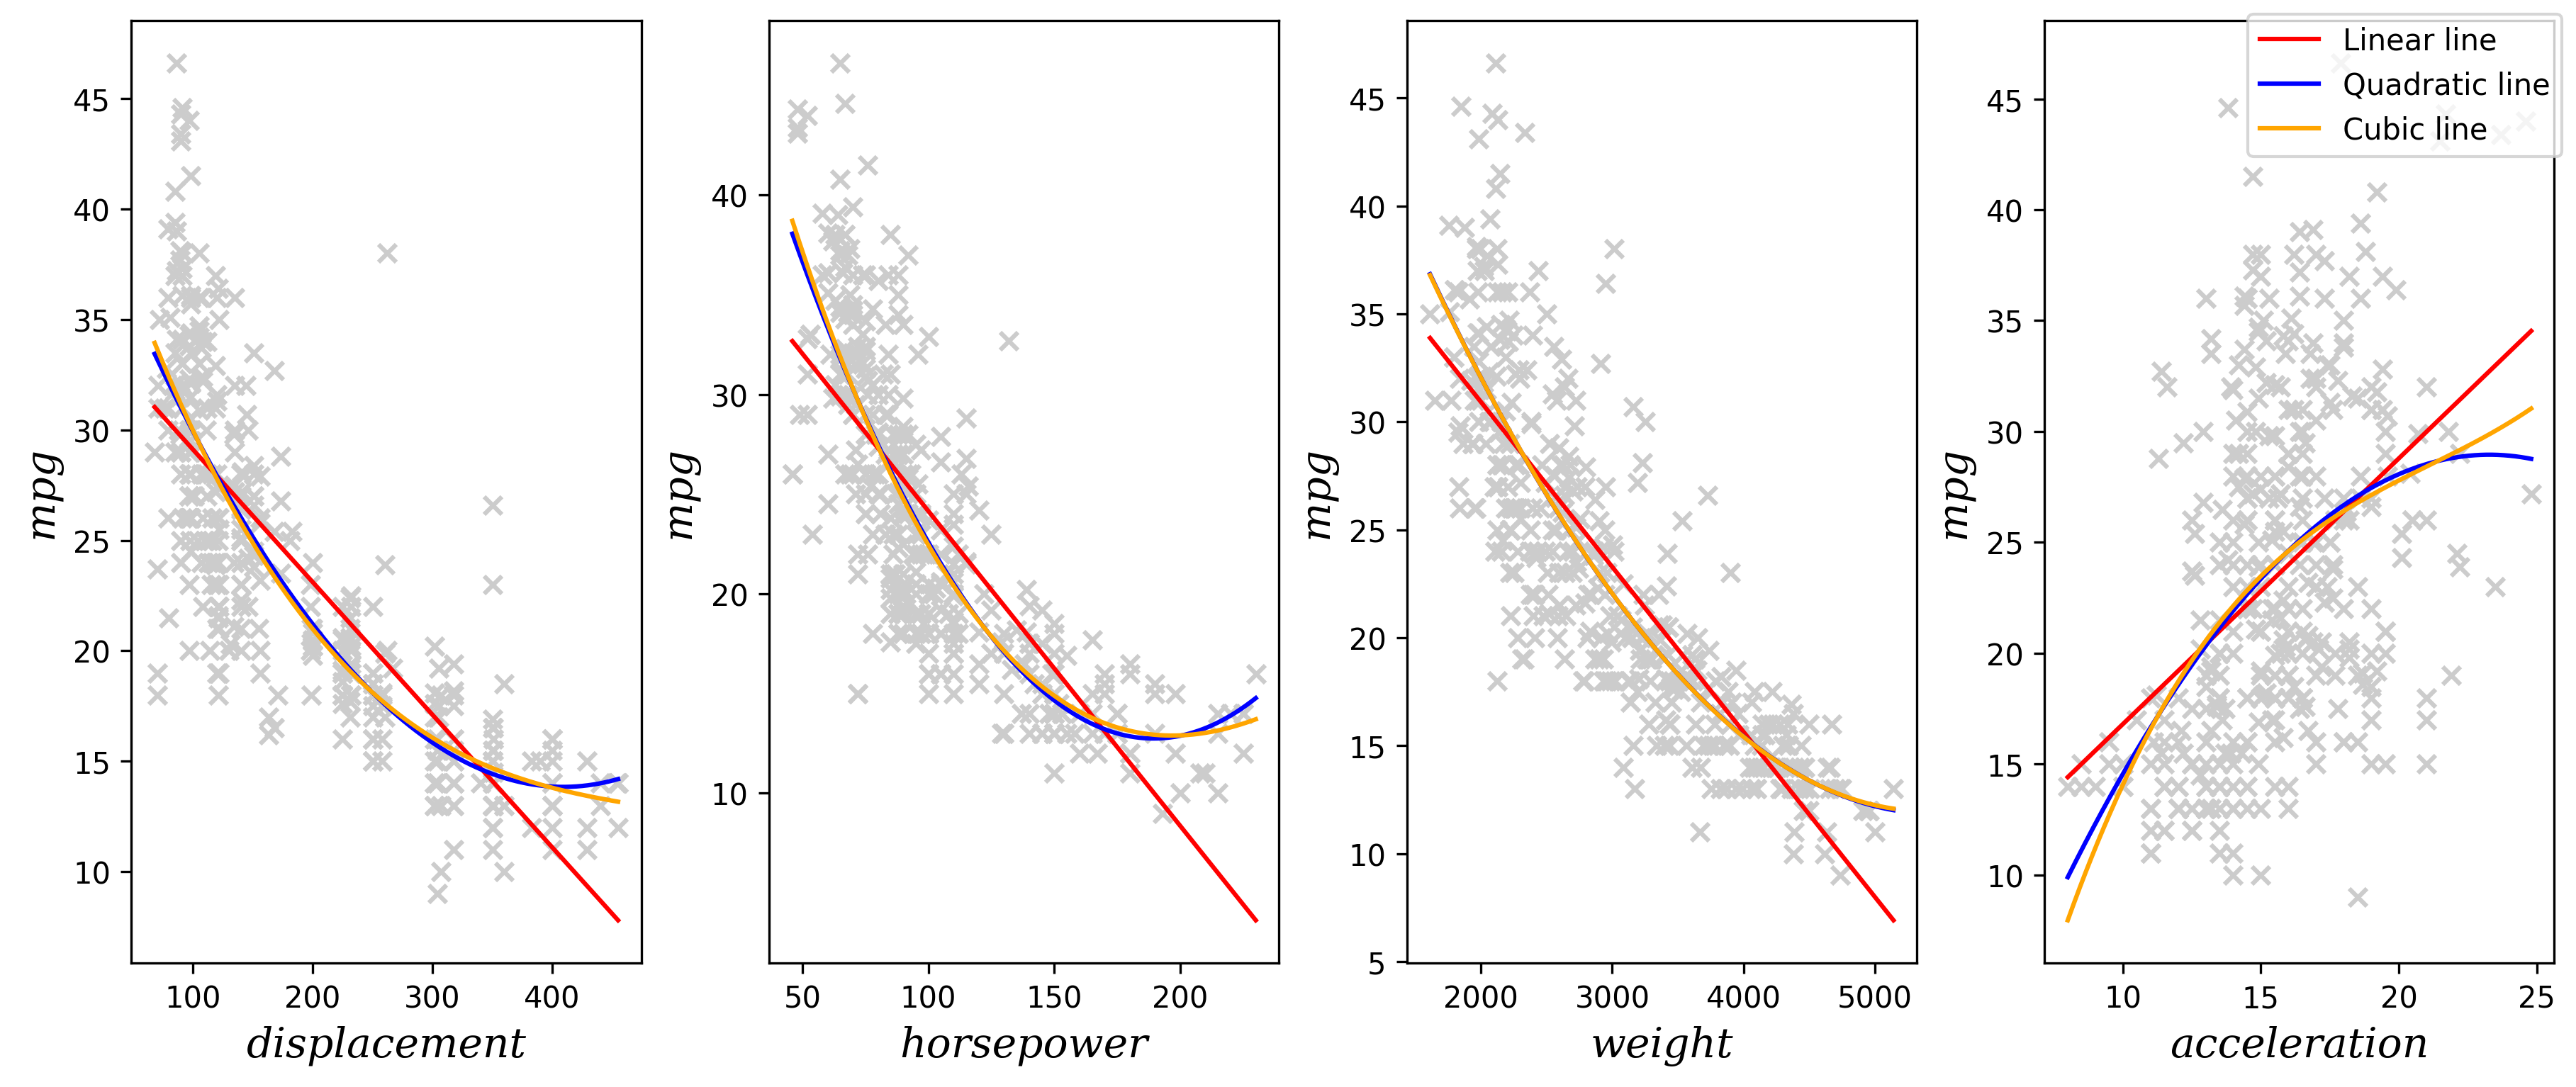

In [30]:
#scatter
fig,axs = plt.subplots(1,4,figsize=(12,5),dpi=300,constrained_layout=True)


axs[0].scatter(x=mpg['displacement'],y=mpg.mpg,marker='x',color='.8')
axs[0].plot(x_fit_d,y_fit_d1,label='Linear line',color='red')
axs[0].plot(x_fit_d,y_fit_d2,label='Quadratic line',color='blue')
axs[0].plot(x_fit_d,y_fit_d3,label='Cubic line',color='orange')


axs[1].scatter(x=mpg['horsepower'],y=mpg.mpg,marker='x',color='.8')
axs[1].plot(x_fit_h,y_fit_h1,label='Linear Line',color='red')
axs[1].plot(x_fit_h,y_fit_h2,label='Quadratic line',color='blue')
axs[1].plot(x_fit_h,y_fit_h3,label='Cubic line',color='orange')


axs[2].scatter(x=mpg['weight'],y=mpg.mpg,marker='x',color='.8')
axs[2].plot(x_fit_w,y_fit_w1,label='Linear Line',color='red')
axs[2].plot(x_fit_w,y_fit_w2,label='Quadratic line',color='blue')
axs[2].plot(x_fit_w,y_fit_w3,label='Cubic line',color='orange')



axs[3].scatter(x=mpg['acceleration'],y=mpg.mpg,marker='x',color='.8')
axs[3].plot(x_fit_a,y_fit_a1,label='Regression Line',color='red')
axs[3].plot(x_fit_a,y_fit_a2,label='Quadratic line',color='blue')
axs[3].plot(x_fit_a,y_fit_a3,label='Cubic line',color='orange')


axs[0].set_ylabel('mpg',fontdict=fontdict_label)
axs[0].set_xlabel('displacement',fontdict=fontdict_label)

axs[1].set_ylabel('mpg',fontdict=fontdict_label)
axs[1].set_xlabel('horsepower',fontdict=fontdict_label)

axs[2].set_ylabel('mpg',fontdict=fontdict_label)
axs[2].set_xlabel('weight',fontdict=fontdict_label)

axs[3].set_ylabel('mpg',fontdict=fontdict_label)
axs[3].set_xlabel('acceleration',fontdict=fontdict_label)

lines = [l for l in axs[0].lines if l.get_label()] 
fig.legend(lines, [l.get_label() for l in lines], loc='upper right', ncol=1)

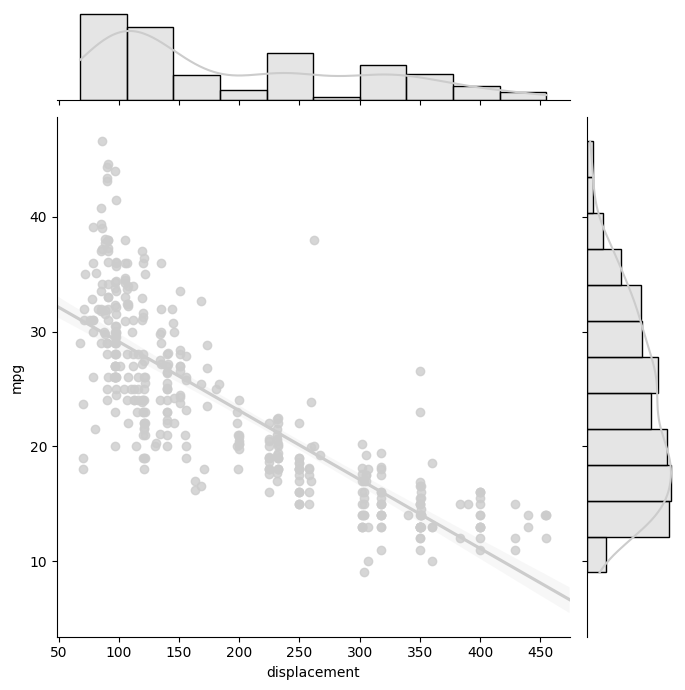

In [31]:
#joinplot
sns.jointplot(x='displacement',y='mpg',data=mpg,kind="reg", truncate=False,color="0.8", height=7)

Text(0.5, 0, 'cylinders')

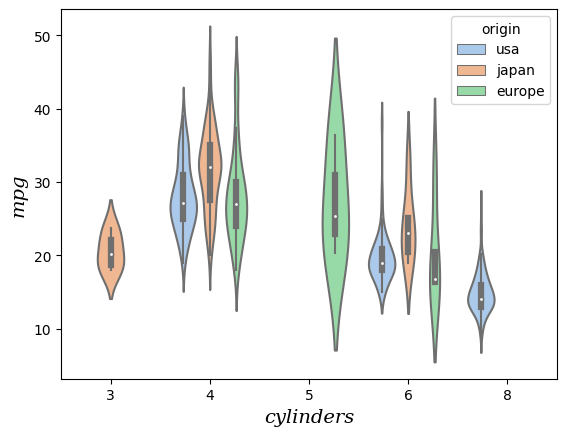

In [32]:
#boxplot
fig,ax = plt.subplots()
sns.violinplot(data=mpg,x='cylinders',y='mpg',hue='origin',palette='pastel')

ax.set_ylabel('mpg',fontdict=fontdict_label)
ax.set_xlabel('cylinders',fontdict=fontdict_label)

In [33]:
mpg.groupby('origin')['name'].count()

origin
europe     68
japan      79
usa       245
Name: name, dtype: int64

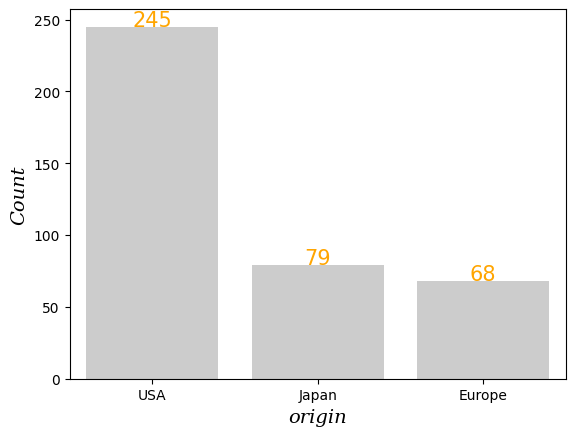

In [34]:
#barplot
fig,ax = plt.subplots()
sns.countplot(data=mpg,x='origin',color='0.8')

ax.set_ylabel('Count',fontdict=fontdict_label)
ax.set_xlabel('origin',fontdict=fontdict_label)
ax.set_xticklabels(labels=['USA','Japan','Europe'])

for i ,value in enumerate([245,79,68]):
    ax.text(i,value+0.5,str(value),ha='center',color='orange',size=15)

Text(0.5, 0.98, 'Correlation Diagram')

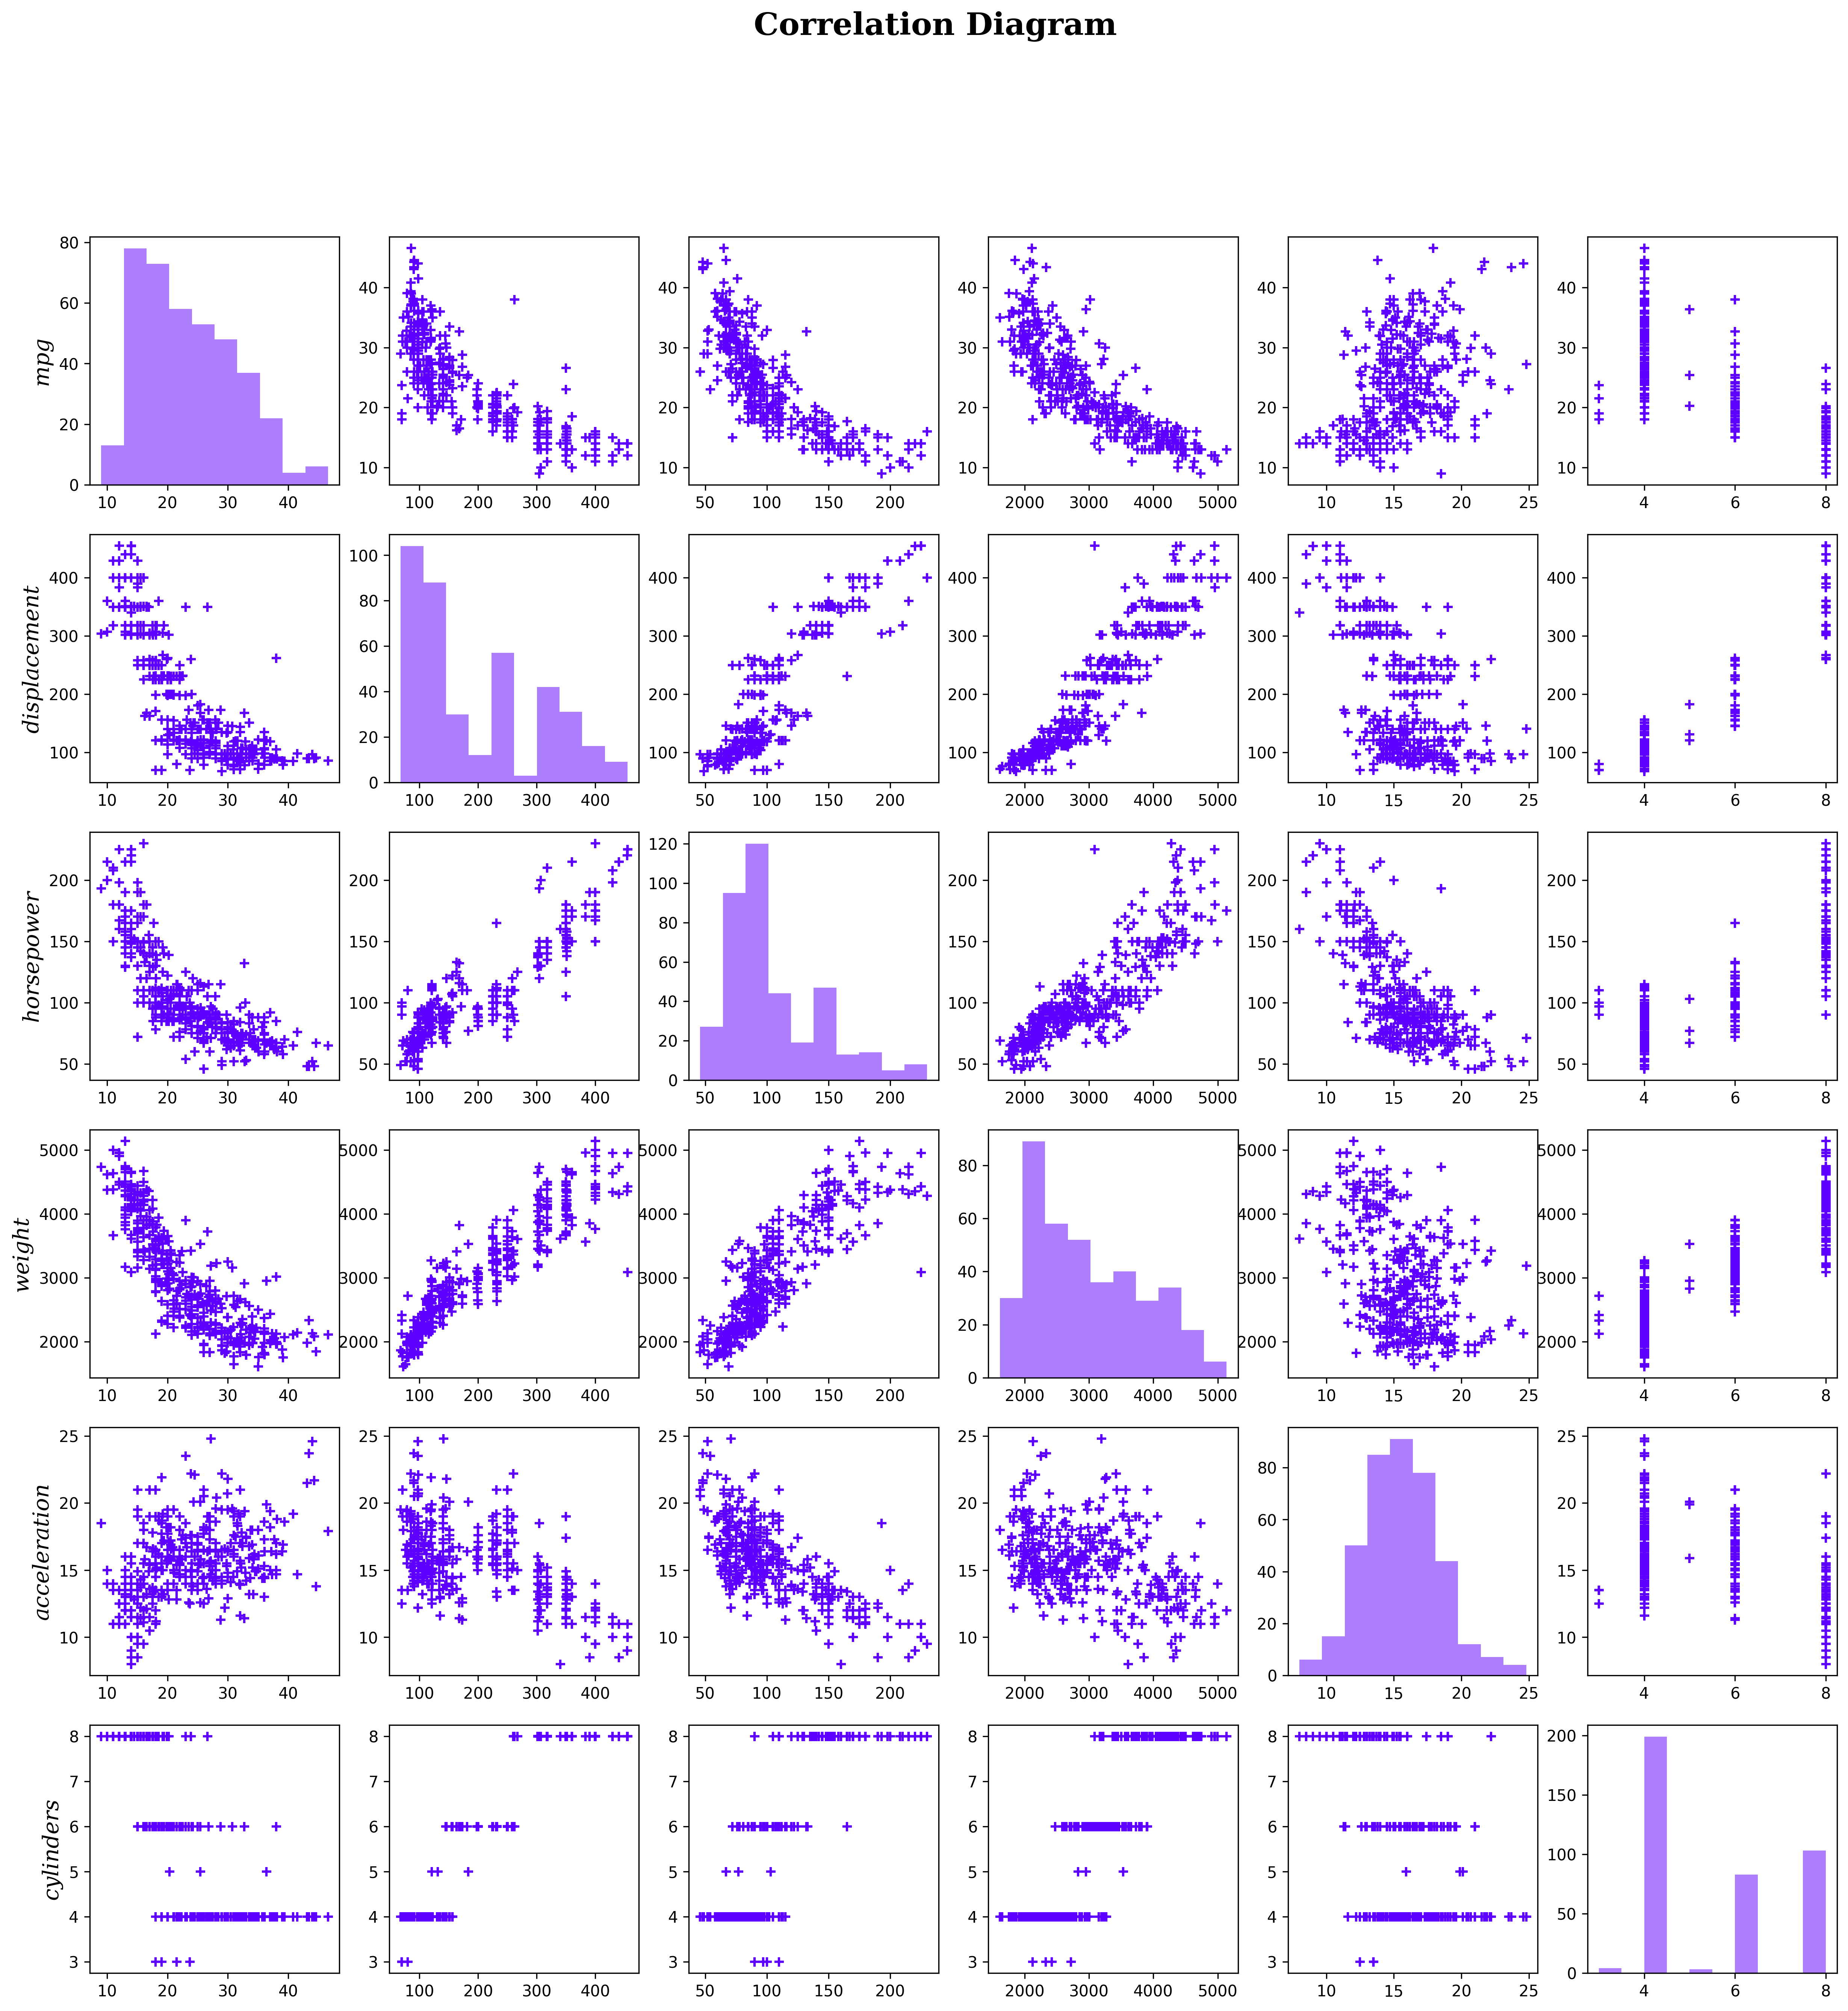

In [35]:
#Correlation Diagram
#sns.pairplot(df, hue="species")
fig,axs = plt.subplots(6,6,figsize=(20,20),dpi=300)

features_list = ['mpg','displacement','horsepower','weight','acceleration','cylinders']

#scatter
for i,var in enumerate(features_list):
    for j in range(6):
        if i==j:
            axs[i][j].hist(data=mpg,x=var,color='#5D00FF',alpha=.5)
        else:
            axs[i][j].scatter(data=mpg,x=features_list[j],y=var,color='#5D00FF',marker='+')


for i ,f in enumerate(features_list):
    axs[i][0].set_ylabel(f,fontdict=fontdict_label)

fig.suptitle('Correlation Diagram',size=20,family='serif',weight='bold')


In [36]:
#correlation matrix
#Pearson correlation
correlation_coefficient = mpg[features_list].corr() #return a pd.DataFrame

Text(0.5, 1.0, 'Correlation Matrix')

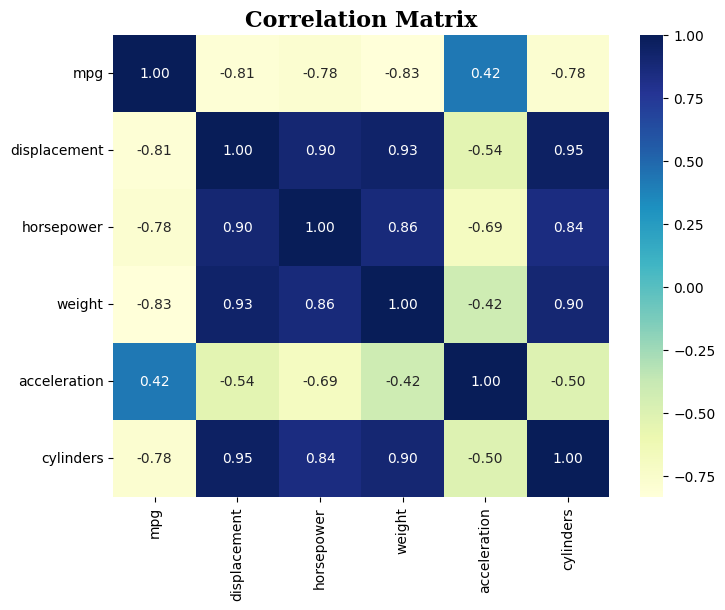

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(correlation_coefficient,annot=True,fmt='.2f',cmap='YlGnBu')
ax.set_title('Correlation Matrix',fontdict=fontdict_title)

Text(0.5, 0, 'mpg')

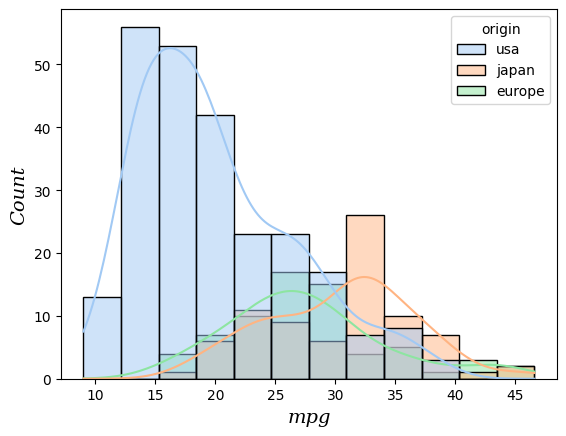

In [38]:
fig,ax = plt.subplots()
sns.histplot(data=mpg,x='mpg',hue='origin',palette='pastel',kde=True,ax=ax)

ax.set_ylabel('Count',fontdict=fontdict_label)
ax.set_xlabel('mpg',fontdict=fontdict_label)

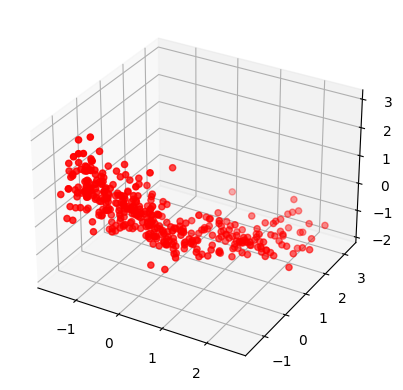

In [39]:
# 3D
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mpg_scalered = scaler.fit_transform(mpg[['weight','horsepower','mpg']])

fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.scatter(mpg_scalered[:,0],mpg_scalered[:,1],mpg_scalered[:,2],c='red')

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(mpg[['acceleration','weight']].values)

#get labels
centre_ids = kmeans.cluster_centers_
labels = kmeans.labels_

Text(20, 2000, 'Type 2')

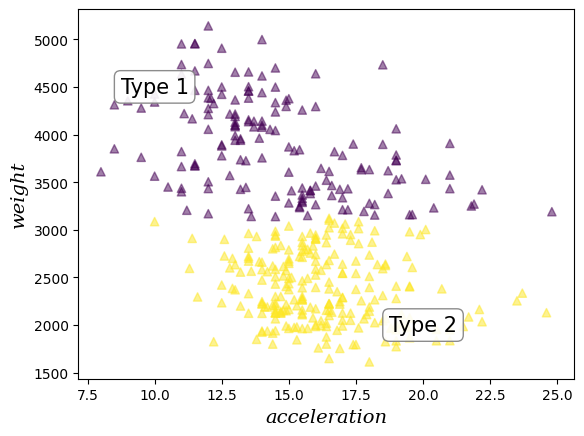

In [41]:
#cluster
fig,ax =plt.subplots()
ax.scatter(mpg['acceleration'].values,mpg['weight'].values,c=labels,marker='^',alpha=0.5)

ax.set_ylabel('weight',fontdict=fontdict_label)
ax.set_xlabel('acceleration',fontdict=fontdict_label)

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(10,4500,'Type 1',ha='center',va='center',size=15,bbox=bbox_props)
ax.text(20,2000,'Type 2',ha='center',va='center',size=15,bbox=bbox_props)

In [42]:
#LASSO
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target = 'mpg'
features_ = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
df_encoded = pd.get_dummies(mpg[features_], columns=['origin'],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df_encoded[df_encoded.columns[1:]],df_encoded[target] , test_size=0.2, random_state=42)

# alpha
test_errors=[]
train_errors=[]
alpha_lasso = np.linspace(0,1,10)

for i in alpha_lasso:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    y_pred_tra=lasso.predict(X_train)
    mse_test = mean_squared_error(y_test, y_pred)
    mes_train = mean_squared_error(y_train,y_pred_tra)
    test_errors.append(mse_test)
    train_errors.append(mes_train)

Text(0.5, 0, 'lasso alpha')

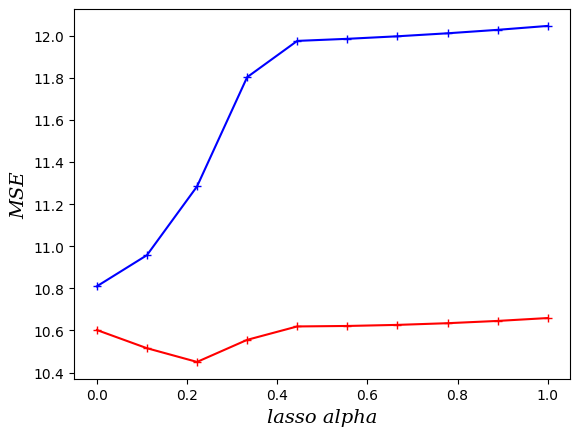

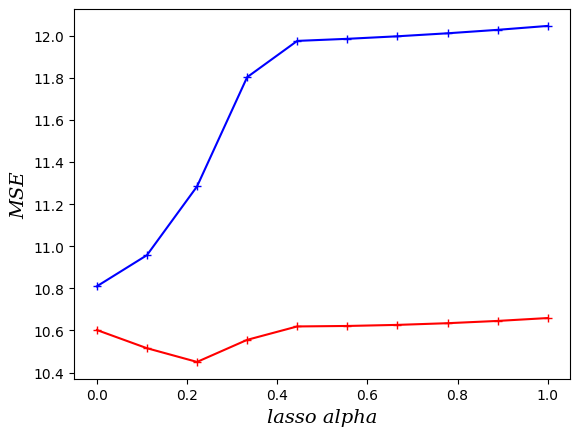

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(alpha_lasso,test_errors,color='red',linestyle='-',marker='+',label='train_mse')
ax.plot(alpha_lasso,train_errors,color='blue',linestyle='-',marker='+',label='test_mse')
ax.set_ylabel('MSE',fontdict=fontdict_label)
ax.set_xlabel('lasso alpha',fontdict=fontdict_label)

# 基于plotly的动态可视化绘图
https://plotly.com/graphing-libraries/
plotly.express

The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

In [ ]:
mpg = sns.load_dataset('mpg')
#dropna
mpg.dropna(inplace=True)

In [ ]:
#scatter
fig = px.scatter(mpg,x='displacement',y='mpg',color='origin',size='cylinders')
fig.update_layout(xaxis_title='displacement',yaxis_title='miles per gallon',
                 title='Bubble plot ')
fig.show()

In [ ]:
#box
fig = px.box(mpg,x='cylinders',y='mpg',color='origin')
fig.show()

In [ ]:
#joint
fig = px.scatter(mpg,x='acceleration',y='mpg',
                 trendline='ols',
                 color='origin',
                marginal_x='box',
                marginal_y='histogram',
                template='plotly_dark')
fig.show()

In [ ]:
#matrix
fig = px.scatter_matrix(mpg,dimensions=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year'],
                        color='origin')
fig.show()

In [ ]:
#3D
fig = px.scatter_3d(mpg,x='acceleration',y='displacement',z='mpg',
                    color='origin',symbol='origin')
fig.show()

In [ ]:
def z_score(x):
    if x.dtypes in [np.int64,np.float64]:
        return (x-np.mean(x))/np.std(x)
    else:
        return x
    
df = (mpg.apply(z_score).drop(columns='name')
      .groupby(by='origin')
      .mean().stack()
      .reset_index()
      .rename(columns={'level_1':'features',0:'values'}))

In [ ]:
fig = px.line_polar(df,r='values',theta='features',color='origin',
                   line_close=True,
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
#basic
#px.histogram()
hist_data = [mpg[mpg['origin']=='usa'].mpg,
            mpg[mpg['origin']=='japan'].mpg,
            mpg[mpg['origin']=='europe'].mpg]

group_labels = ['usa','japan','europe']

fig = ff.create_distplot(hist_data,group_labels)
fig.show()


In [ ]:
from sklearn.linear_model import LinearRegression
X=mpg[['horsepower','acceleration']]
y=mpg['mpg']

model = LinearRegression()
model.fit(X,y)

mesh_size = .02
margin = 0
#create a mesh grid
x_min , x_max = X.horsepower.min()-margin ,X.horsepower.max()+margin
y_min , y_max = X.acceleration.min()-margin,X.acceleration.max()+margin

xrange = np.arange(x_min,x_max,mesh_size)
yrange = np.arange(y_min,y_max,mesh_size)


xx,yy = np.meshgrid(xrange,yrange)

pred = model.predict(np.c_[xx.ravel(),yy.ravel()])
pred = pred.reshape(xx.shape)

In [ ]:
import plotly.graph_objects as go
fig = px.scatter_3d(mpg,x='horsepower',y='acceleration',z='mpg')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()